<a href="https://colab.research.google.com/github/Diacod-I/BourneToKill/blob/main/BioInfo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Monoamine Oxidase A

Monoamine Oxidase - A is an enzyme meant to break down neurotransmitters like serotonin, norepinephrine, epinephrine and dopamine. However, when the MAOA producing gene is mutated to a different variant (MAOA-L) due to a rare genetic condition called the ***Brunner's Syndrome***, it causes a deficiency in Monoamine Oxidase - A or creation of low-activity MAOA.<br><br>
The effects of this may include impulsive and aggressive behaviour, pyromania, hypersexuality etc. These traits are most commonly found in serial killers, and it is commonly termed as the **"Warrior"** gene.<br><br>
In the case of ***Bradley Waldroup***, who was [charged for aggravated kidnapping, voluntary manslaughter and attempted second-degree murder](https://casetext.com/case/state-v-waldroup-2) on the account of shooting his wife's friend 8 times and attacking his wife with a machete, he had the MAOA-L variant of the gene that added to his violent behaviour. Even though the final judgement of charges remained free of sway, this factor was well considered in his trial, leading to a slightly reduced sentence.<br><br>

<img src="https://wehco.media.clients.ellingtoncms.com/timesfreepress/img/news/tease/2012/04/11/121210_WEB_b_bradley_waldroup_t800.jpg?90232451fbcadccc64a17de7521d859a8f88077d" width=400><br>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
***Image of Bradley Waldroup***



<br><br>


The following notebook shows analysis of MAOA inhibition assay data. Inhibitors of MAOA (also known as MAOIs) is used to treat atypical depression, PTSD, OCD and mild anxiety disorder. This analysis will promote drug discovery with respect to the treatment of the above mentioned disorders through MAOA inhibition.

## Installation of packages

In [2]:
!pip install chembl_webresource_client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 7.6 MB/s eta 0:00:00
  Attempting uninstall: attrs
    Found existing installation: attrs 22.2.0
    Uninstalling attrs-22.2.0:
      Successfully uninstalled attrs-22.2.0


In [3]:
from chembl_webresource_client.new_client import new_client

In [4]:
pip install rdkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 47.8 MB/s eta 0:00:00


## Importing Libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import ast
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import cv2
from google.colab.patches import cv2_imshow
import math
import scipy.stats as stats

## Searching for Target Protein MAO-A

In [ ]:
target = new_client.target
target_query = target.search('MAOA')
queries = pd.DataFrame.from_dict(target_query)
queries

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P21397', 'xref_name': None, 'xre...",Homo sapiens,Monoamine oxidase A,15.0,False,CHEMBL1951,"[{'accession': 'P21397', 'component_descriptio...",SINGLE PROTEIN,9606
1,"[{'xref_id': 'P21398', 'xref_name': None, 'xre...",Bos taurus,Monoamine oxidase A,15.0,False,CHEMBL3254,"[{'accession': 'P21398', 'component_descriptio...",SINGLE PROTEIN,9913
2,"[{'xref_id': 'P21396', 'xref_name': None, 'xre...",Rattus norvegicus,Monoamine oxidase A,15.0,False,CHEMBL3358,"[{'accession': 'P21396', 'component_descriptio...",SINGLE PROTEIN,10116
3,"[{'xref_id': 'NBK23217', 'xref_name': 'Monoami...",Mus musculus,Monoamine oxidase A,15.0,False,CHEMBL3681,"[{'accession': 'Q64133', 'component_descriptio...",SINGLE PROTEIN,10090
4,[],Rattus norvegicus,Monoamine oxidase,13.0,False,CHEMBL2095196,"[{'accession': 'P19643', 'component_descriptio...",PROTEIN FAMILY,10116
5,[],Homo sapiens,Monoamine oxidase,13.0,False,CHEMBL2095205,"[{'accession': 'P21397', 'component_descriptio...",PROTEIN FAMILY,9606
6,[],Mus musculus,Monoamine oxidase,13.0,False,CHEMBL2111442,"[{'accession': 'Q8BW75', 'component_descriptio...",PROTEIN FAMILY,10090
7,[],Bos taurus,Monoamine oxidase,13.0,False,CHEMBL2111399,"[{'accession': 'P56560', 'component_descriptio...",PROTEIN FAMILY,9913


In [ ]:
xrefs = queries.target_components[0][0]['target_component_xrefs']
xrefs

[{'xref_id': 'MAOA', 'xref_name': 'Brunner syndrome', 'xref_src_db': 'CGD'},
 {'xref_id': 'P21397', 'xref_name': None, 'xref_src_db': 'ExpressionAtlas'},
 {'xref_id': 'GO:0005739',
  'xref_name': 'mitochondrion',
  'xref_src_db': 'GoComponent'},
 {'xref_id': 'GO:0005741',
  'xref_name': 'mitochondrial outer membrane',
  'xref_src_db': 'GoComponent'},
 {'xref_id': 'GO:0005829',
  'xref_name': 'cytosol',
  'xref_src_db': 'GoComponent'},
 {'xref_id': 'GO:0016020',
  'xref_name': 'membrane',
  'xref_src_db': 'GoComponent'},
 {'xref_id': 'GO:0005515',
  'xref_name': 'protein binding',
  'xref_src_db': 'GoFunction'},
 {'xref_id': 'GO:0008131',
  'xref_name': 'primary amine oxidase activity',
  'xref_src_db': 'GoFunction'},
 {'xref_id': 'GO:0016491',
  'xref_name': 'oxidoreductase activity',
  'xref_src_db': 'GoFunction'},
 {'xref_id': 'GO:0050660',
  'xref_name': 'flavin adenine dinucleotide binding',
  'xref_src_db': 'GoFunction'},
 {'xref_id': 'GO:0052595',
  'xref_name': 'aliphatic amine 

In [ ]:
MaOA = queries.target_chembl_id[0]
MaOA

'CHEMBL1951'

Now the following shows the retrieval of bioactivity data for Monoamine oxidase A from ChemBL

In [ ]:
activity = new_client.activity
bio = activity.filter(target_chembl_id=MaOA).filter(standard_type='IC50')

In [ ]:
biodf = pd.DataFrame.from_dict(bio)

In [ ]:
biodf.head()

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,184068,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Monoamine oxidase A,9606,None,None,IC50,uM,UO_0000065,None,5.47
1,None,185442,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Monoamine oxidase A,9606,None,None,IC50,uM,UO_0000065,None,1.36
2,None,189322,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Monoamine oxidase A,9606,None,None,IC50,uM,UO_0000065,None,30.8
3,None,190494,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Monoamine oxidase A,9606,None,None,IC50,uM,UO_0000065,None,22.5
4,None,191747,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Monoamine oxidase A,9606,None,None,IC50,uM,UO_0000065,None,0.18


In [ ]:
biodf.standard_type.unique()

array(['IC50'], dtype=object)

In [ ]:
biodf.columns

Index(['activity_comment', 'activity_id', 'activity_properties',
       'assay_chembl_id', 'assay_description', 'assay_type',
       'assay_variant_accession', 'assay_variant_mutation', 'bao_endpoint',
       'bao_format', 'bao_label', 'canonical_smiles', 'data_validity_comment',
       'data_validity_description', 'document_chembl_id', 'document_journal',
       'document_year', 'ligand_efficiency', 'molecule_chembl_id',
       'molecule_pref_name', 'parent_molecule_chembl_id', 'pchembl_value',
       'potential_duplicate', 'qudt_units', 'record_id', 'relation', 'src_id',
       'standard_flag', 'standard_relation', 'standard_text_value',
       'standard_type', 'standard_units', 'standard_upper_value',
       'standard_value', 'target_chembl_id', 'target_organism',
       'target_pref_name', 'target_tax_id', 'text_value', 'toid', 'type',
       'units', 'uo_units', 'upper_value', 'value'],
      dtype='object')

In [ ]:
biodf.to_csv('bioactivityMAO-A.csv',index=False)

In [ ]:
biodf[biodf['target_organism']=='Homo sapiens']['assay_description'].unique()

## Extraction and Wrangling of Data

In [ ]:
!head "/content/bioactivityMAO-A.csv"

activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
,184068,[],CHEMBL715193,Compound was tested for inhibition of monoamine oxidase-A (MAO-A).,B,,,BAO_0000190,BAO_0000357,single protein format,C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NCc3ccccc3)c(Br)c21,,,CHEMBL1151505,Bioorg Med Chem Lett,1996.0,"{'bei': '12.34', 'le': '0.27', 'lle': '0.67', 'sei': '9.46'}",CHEMBL156630,,CHEMBL15663

In [ ]:
biocsv = pd.read_csv("/content/bioactivityMAO-A.csv")

In [ ]:
biocsv = biocsv[biocsv.standard_value.notna()].drop('activity_comment',axis=1)

In [ ]:
biocsv[biocsv.bao_label=='single protein format'].head()

,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,184068,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,Homo sapiens,Monoamine oxidase A,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,5.47
1,185442,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,Homo sapiens,Monoamine oxidase A,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,1.36
2,189322,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,Homo sapiens,Monoamine oxidase A,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,30.80
3,190494,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,Homo sapiens,Monoamine oxidase A,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,22.50
4,191747,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,Homo sapiens,Monoamine oxidase A,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.18


In [ ]:
biocsv.columns

Index(['activity_id', 'activity_properties', 'assay_chembl_id',
       'assay_description', 'assay_type', 'assay_variant_accession',
       'assay_variant_mutation', 'bao_endpoint', 'bao_format', 'bao_label',
       'canonical_smiles', 'data_validity_comment',
       'data_validity_description', 'document_chembl_id', 'document_journal',
       'document_year', 'ligand_efficiency', 'molecule_chembl_id',
       'molecule_pref_name', 'parent_molecule_chembl_id', 'pchembl_value',
       'potential_duplicate', 'qudt_units', 'record_id', 'relation', 'src_id',
       'standard_flag', 'standard_relation', 'standard_text_value',
       'standard_type', 'standard_units', 'standard_upper_value',
       'standard_value', 'target_chembl_id', 'target_organism',
       'target_pref_name', 'target_tax_id', 'text_value', 'toid', 'type',
       'units', 'uo_units', 'upper_value', 'value'],
      dtype='object')

In [ ]:
biocsv.molecule_pref_name.unique()

array([nan, 'BROFAROMINE', 'RASAGILINE', 'AZILECT', 'GEIPARVARIN',
       'XANTHONE', 'DEMETHYLBELLIDIFOLIN', 'BELLIDIFOLIN',
       'GENTIAKOCHIANIN', 'DECUSSATIN', 'TRANYLCYPROMINE HYDROCHLORIDE',
       'HYDRAZINECARBOXAMIDE', 'METHOXSALEN', 'LADOSTIGIL', 'SELEGILINE',
       'MOCLOBEMIDE', 'IPRONIAZID', 'CLORGILINE', 'LUTEOLIN', 'APIGENIN',
       'QUERCETIN', 'ISATIN', 'CIPARGAMIN', '(E)-6-STYRYLISATIN',
       '4-BENZYLOXYANILINE', '3-(BENZYLOXY)ANILINE',
       '4-PHENETHYLANILINE HYDROCHLORIDE', '4-PHENOXYANILINE',
       '(E)-4-STYRYLANILINE', 'GLITAZONE', 'PHTHALIMIDE',
       'N-PHENYLCINNAMAMIDE', 'N-M-TOLYLCINNAMAMIDE',
       'N-(3-CHLOROPHENYL)CINNAMAMIDE', 'BENZO[DEF]CHRYSENE',
       '1-NAPHTHYLISOTHIOCYANATE', 'AMILORIDE', '2-ACETYLAMINOFLUORENE',
       '2-HYDROXYPROPYL-BETA-CYCLODEXTRIN', 'GUANABENZ',
       'ETHYNODIOL DIACETATE', 'GENISTEIN', 'CIGLITAZONE', 'DISULFIRAM',
       'CHLOROXYLENOL', 'PHENELZINE', 'PENTAMIDINE', 'NOCODAZOLE',
       'PHENOTHIAZINE', 'PI

In [ ]:
biocsv.value

0         5.47
1         1.36
2        30.80
3        22.50
4         0.18
         ...  
4959     30.30
4960      4.54
4961      6.70
4962    161.40
4965     10.00
Name: value, Length: 3804, dtype: float64

The SMILES Notation represents molecule structural information.

In [ ]:
biocsv.canonical_smiles.head()

0    C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NCc3ccccc3)c(Br)c21
1            C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NC)c(Cl)c21
2                      CC(C)/N=C1/CCc2c1n(C)c1ccccc21
3            C/N=C1/CCc2c1n(C)c1cc(Cl)c(OC(=O)NC)cc21
4                       COc1cc(Br)c2oc(C3CCNCC3)cc2c1
Name: canonical_smiles, dtype: object

In [ ]:
biocsv.standard_units.unique()

array(['nM', 'ug.mL-1', 'µM'], dtype=object)

In [ ]:
print("Total number of ChemBL molecule IDs:",biocsv.molecule_chembl_id.count())

Total number of ChemBL molecule IDs: 3804


In [ ]:
print("Unique number of ChemBL molecule IDs:",len(biocsv.molecule_chembl_id.unique()))

Unique number of ChemBL molecule IDs: 3224


Now time to categorize the molecules based on its standard value.<br> We have extracted data based on the IC<sub>50</sub> (half-maximal inhibitory concentration) type, which is a conventional measure used to check the inhibitory potency of a drug on a target.<br>On the basis of IC<sub>50</sub>, the inhibitory concentration will considered the classifying feature, and so we will consider drugs with 1000 nM and below to be ***'Active'*** drugs, drugs with 10,000 nM and above to be ***'Inactive'*** and the drugs that lies in between to be ***'Intermediate'***.

In [ ]:
nanoclassed = biocsv[biocsv.standard_units=='nM']
nanoclassed.head()

,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,184068,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,Homo sapiens,Monoamine oxidase A,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,5.47
1,185442,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,Homo sapiens,Monoamine oxidase A,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,1.36
2,189322,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,Homo sapiens,Monoamine oxidase A,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,30.80
3,190494,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,Homo sapiens,Monoamine oxidase A,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,22.50
4,191747,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,Homo sapiens,Monoamine oxidase A,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.18


In [ ]:
nanoclassed[nanoclassed.standard_value<1000].head()

,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
4,191747,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,Homo sapiens,Monoamine oxidase A,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.18
9,195163,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,Homo sapiens,Monoamine oxidase A,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.75
12,204730,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,Homo sapiens,Monoamine oxidase A,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.21
13,205972,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,Homo sapiens,Monoamine oxidase A,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.65
14,208321,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,Homo sapiens,Monoamine oxidase A,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.92


In [ ]:
nanoclassed[nanoclassed.standard_value>10000].head()

,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
2,189322,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,Homo sapiens,Monoamine oxidase A,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,30.8
3,190494,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,Homo sapiens,Monoamine oxidase A,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,22.5
6,192853,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,Homo sapiens,Monoamine oxidase A,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,1000.0
7,192856,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,Homo sapiens,Monoamine oxidase A,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,1000.0
8,194036,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,Homo sapiens,Monoamine oxidase A,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,113.0


In [ ]:
nanoclassed[nanoclassed.standard_value>1000][nanoclassed.standard_value<10000].head()

<ipython-input-226-42a5cef001de>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nanoclassed[nanoclassed.standard_value>1000][nanoclassed.standard_value<10000].head()


,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,184068,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,Homo sapiens,Monoamine oxidase A,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,5.47
1,185442,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,Homo sapiens,Monoamine oxidase A,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,1.36
5,192851,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,Homo sapiens,Monoamine oxidase A,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,2.12
10,198575,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,Homo sapiens,Monoamine oxidase A,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,1.61
19,218928,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,Homo sapiens,Monoamine oxidase A,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,3.74


In [ ]:
smoldf = nanoclassed[['molecule_chembl_id','standard_value','canonical_smiles','ligand_efficiency']]

In [ ]:
smoldf.reset_index(drop=True,inplace=True)
smoldf = smoldf.dropna()
smoldf

,molecule_chembl_id,standard_value,canonical_smiles,ligand_efficiency
0,CHEMBL156630,5470.0,C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NCc3ccccc3)c(Br)c21,"{'bei': '12.34', 'le': '0.27', 'lle': '0.67', ..."
1,CHEMBL155754,1360.0,C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NC)c(Cl)c21,"{'bei': '19.19', 'le': '0.38', 'lle': '2.95', ..."
2,CHEMBL348083,30800.0,CC(C)/N=C1/CCc2c1n(C)c1ccccc21,"{'bei': '19.93', 'le': '0.36', 'lle': '1.19', ..."
3,CHEMBL157182,22500.0,C/N=C1/CCc2c1n(C)c1cc(Cl)c(OC(=O)NC)cc21,"{'bei': '15.20', 'le': '0.30', 'lle': '1.73', ..."
4,CHEMBL160347,180.0,COc1cc(Br)c2oc(C3CCNCC3)cc2c1,"{'bei': '21.74', 'le': '0.51', 'lle': '3.07', ..."
...,...,...,...,...
2618,CHEMBL5084419,3400.0,O=c1[nH]nc(/C=C/c2ccc(O)c(O)c2)o1,"{'bei': '24.84', 'le': '0.47', 'lle': '4.53', ..."
2619,CHEMBL4284618,47000.0,C#CCNC(=O)/C=C/c1ccc(O)c(O)c1,"{'bei': '19.92', 'le': '0.37', 'lle': '3.47', ..."
2620,CHEMBL5077905,30300.0,C#CCNC/C=C/c1ccc(O)c(OC)c1,"{'bei': '20.80', 'le': '0.39', 'lle': '2.88', ..."
2621,CHEMBL165,4540.0,Oc1ccc(/C=C/c2cc(O)cc(O)c2)cc1,"{'bei': '23.41', 'le': '0.43', 'lle': '2.37', ..."


In [ ]:
classlis = []
for _ in smoldf.standard_value:
  if float(_)<1000:
    classlis.append('Active')
  elif float(_)>1000 and float(_)<10000:
    classlis.append('Intermediate')
  else:
    classlis.append('Inactive')

In [ ]:
classlis[0:5]

['Intermediate', 'Intermediate', 'Inactive', 'Inactive', 'Active']

In [ ]:
classlis = pd.DataFrame(classlis).dropna()
classlis.columns = ['Inhib_class']
classlis

,Inhib_class
0,Intermediate
1,Intermediate
2,Inactive
3,Inactive
4,Active
...,...
2618,Intermediate
2619,Inactive
2620,Inactive
2621,Intermediate


In [ ]:
smoldf = pd.concat([smoldf,classlis],axis=1)

In [ ]:
smoldf

,molecule_chembl_id,standard_value,canonical_smiles,ligand_efficiency,Inhib_class
0,CHEMBL156630,5470.0,C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NCc3ccccc3)c(Br)c21,"{'bei': '12.34', 'le': '0.27', 'lle': '0.67', ...",Intermediate
1,CHEMBL155754,1360.0,C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NC)c(Cl)c21,"{'bei': '19.19', 'le': '0.38', 'lle': '2.95', ...",Intermediate
2,CHEMBL348083,30800.0,CC(C)/N=C1/CCc2c1n(C)c1ccccc21,"{'bei': '19.93', 'le': '0.36', 'lle': '1.19', ...",Inactive
3,CHEMBL157182,22500.0,C/N=C1/CCc2c1n(C)c1cc(Cl)c(OC(=O)NC)cc21,"{'bei': '15.20', 'le': '0.30', 'lle': '1.73', ...",Inactive
4,CHEMBL160347,180.0,COc1cc(Br)c2oc(C3CCNCC3)cc2c1,"{'bei': '21.74', 'le': '0.51', 'lle': '3.07', ...",Active
...,...,...,...,...,...
2618,CHEMBL5084419,3400.0,O=c1[nH]nc(/C=C/c2ccc(O)c(O)c2)o1,"{'bei': '24.84', 'le': '0.47', 'lle': '4.53', ...",Intermediate
2619,CHEMBL4284618,47000.0,C#CCNC(=O)/C=C/c1ccc(O)c(O)c1,"{'bei': '19.92', 'le': '0.37', 'lle': '3.47', ...",Inactive
2620,CHEMBL5077905,30300.0,C#CCNC/C=C/c1ccc(O)c(OC)c1,"{'bei': '20.80', 'le': '0.39', 'lle': '2.88', ...",Inactive
2621,CHEMBL165,4540.0,Oc1ccc(/C=C/c2cc(O)cc(O)c2)cc1,"{'bei': '23.41', 'le': '0.43', 'lle': '2.37', ...",Intermediate


In [ ]:
smoldf.to_csv('neededdataMAO-A.csv',index=False)

### Assay Variant Mutation

In [ ]:
nanoclassed.head()

,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,184068,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,Homo sapiens,Monoamine oxidase A,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,5.47
1,185442,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,Homo sapiens,Monoamine oxidase A,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,1.36
2,189322,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,Homo sapiens,Monoamine oxidase A,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,30.80
3,190494,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,Homo sapiens,Monoamine oxidase A,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,22.50
4,191747,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,Homo sapiens,Monoamine oxidase A,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.18


In [ ]:
nanoclassed['assay_variant_mutation'].unique()

array([nan])

This therefore shows that the data has no variant mutation in the given data.

## Preliminary Exploratory Data Analysis

In [6]:
df = pd.read_csv('neededdataMAO-A(changed).csv')

In [7]:
df.head()

,molecule_chembl_id,standard_value,canonical_smiles,ligand_efficiency,Inhib_class
0,CHEMBL156630,5470.0,C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NCc3ccccc3)c(Br)c21,"{'bei': '12.34', 'le': '0.27', 'lle': '0.67', ...",Intermediate
1,CHEMBL155754,1360.0,C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NC)c(Cl)c21,"{'bei': '19.19', 'le': '0.38', 'lle': '2.95', ...",Intermediate
2,CHEMBL348083,30800.0,CC(C)/N=C1/CCc2c1n(C)c1ccccc21,"{'bei': '19.93', 'le': '0.36', 'lle': '1.19', ...",Inactive
3,CHEMBL157182,22500.0,C/N=C1/CCc2c1n(C)c1cc(Cl)c(OC(=O)NC)cc21,"{'bei': '15.20', 'le': '0.30', 'lle': '1.73', ...",Inactive
4,CHEMBL160347,180.0,COc1cc(Br)c2oc(C3CCNCC3)cc2c1,"{'bei': '21.74', 'le': '0.51', 'lle': '3.07', ...",Active


In [8]:
plt.style.use('dark_background')

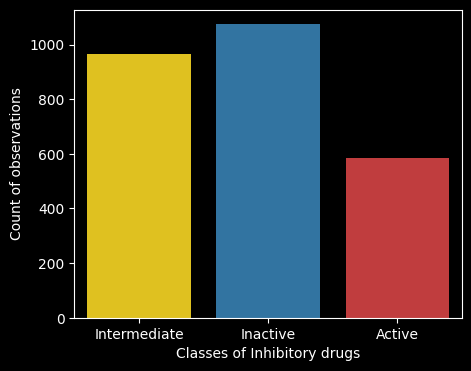

In [9]:
labz = ['Active', 'Inactive', 'Intermediate']
colZ = ['gold','tab:blue','tab:red']
fig,ax = plt.subplots(figsize=(5,4))
sns.countplot(x=df.Inhib_class,palette=colZ)
ax.set_xlabel('Classes of Inhibitory drugs')
ax.set_ylabel('Count of observations')
plt.show()

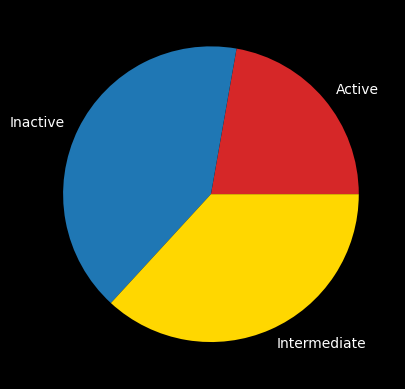

In [10]:
labz = ['Active', 'Inactive', 'Intermediate']
colZ = ['tab:red','tab:blue','gold']
plt.pie([len(df[df['Inhib_class']=='Active']),len(df[df['Inhib_class']=='Inactive']),len(df[df['Inhib_class']=='Intermediate'])],labels = labz, colors= colZ)
plt.rcParams['font.size'] = 6
plt.show()

As you can see, in the above graph and pie chart, among the three classes of inhibitory drugs, majority of them are inactive against MAO-A.

In [11]:
df.standard_value.max(),df.standard_value.min()

(310900.0, 0.1)

In [12]:
df.ligand_efficiency.head()

0    {'bei': '12.34', 'le': '0.27', 'lle': '0.67', ...
1    {'bei': '19.19', 'le': '0.38', 'lle': '2.95', ...
2    {'bei': '19.93', 'le': '0.36', 'lle': '1.19', ...
3    {'bei': '15.20', 'le': '0.30', 'lle': '1.73', ...
4    {'bei': '21.74', 'le': '0.51', 'lle': '3.07', ...
Name: ligand_efficiency, dtype: object

In [13]:
ligdf = df.dropna().copy()

In [14]:
bler = ligdf.ligand_efficiency.apply(lambda x: ast.literal_eval(x))
bler = bler.apply(pd.Series)
bler

,bei,le,lle,sei
0,12.34,0.27,0.67,9.46
1,19.19,0.38,2.95,10.55
2,19.93,0.36,1.19,26.09
3,15.20,0.30,1.73,8.36
4,21.74,0.51,3.07,19.61
...,...,...,...,...
2618,24.84,0.47,4.53,5.50
2619,19.92,0.37,3.47,6.22
2620,20.80,0.39,2.88,10.89
2621,23.41,0.43,2.37,8.80


In [15]:
ligdf = pd.concat([ligdf.drop('ligand_efficiency',axis=1),bler],axis=1)

In [16]:
ligdf.head()

,molecule_chembl_id,standard_value,canonical_smiles,Inhib_class,bei,le,lle,sei
0,CHEMBL156630,5470.0,C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NCc3ccccc3)c(Br)c21,Intermediate,12.34,0.27,0.67,9.46
1,CHEMBL155754,1360.0,C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NC)c(Cl)c21,Intermediate,19.19,0.38,2.95,10.55
2,CHEMBL348083,30800.0,CC(C)/N=C1/CCc2c1n(C)c1ccccc21,Inactive,19.93,0.36,1.19,26.09
3,CHEMBL157182,22500.0,C/N=C1/CCc2c1n(C)c1cc(Cl)c(OC(=O)NC)cc21,Inactive,15.20,0.30,1.73,8.36
4,CHEMBL160347,180.0,COc1cc(Br)c2oc(C3CCNCC3)cc2c1,Active,21.74,0.51,3.07,19.61


In [17]:
ligdf.dtypes

molecule_chembl_id     object
standard_value        float64
canonical_smiles       object
Inhib_class            object
bei                    object
le                     object
lle                    object
sei                    object
dtype: object

In [18]:
ligdf.bei = ligdf.bei.astype(float)
ligdf['le'] = ligdf['le'].astype(float)
ligdf['lle'] = ligdf['lle'].astype(float)
ligdf['sei'] = ligdf['sei'].astype(float)

In [19]:
ligdf.dtypes

molecule_chembl_id     object
standard_value        float64
canonical_smiles       object
Inhib_class            object
bei                   float64
le                    float64
lle                   float64
sei                   float64
dtype: object

In [20]:
ligdf.dropna(inplace=True)

Number of values for Standard Value: 2611 



count      2611.000000
mean      17716.225292
std       24503.638790
min           0.100000
25%        1235.000000
50%        6560.000000
75%       24900.000000
max      310900.000000
Name: standard_value, dtype: float64

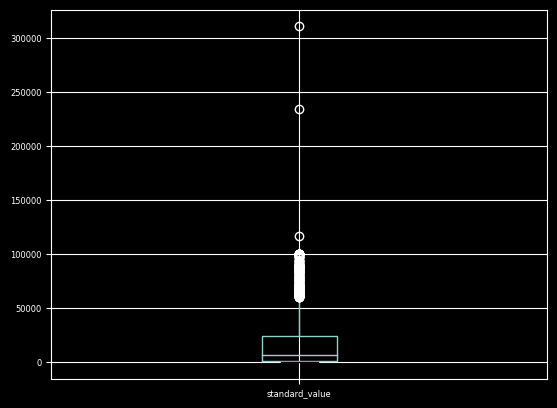

In [21]:
print("Number of values for Standard Value:",ligdf.standard_value.count(),"\n")
standard_val = ligdf.boxplot(column=['standard_value'])
ligdf.standard_value.describe()

Standard value represents the concentration of inhibitory drugs needed for 50% inhibition of MAO-A. Therefore lower its value, higher the potency of the drug on MAO-A. Unit is nanomolar (nM). The above Box plot shows the distribution of data points in the dataset. Here for IC<sub>50</sub> value, majority, if not all, of the outliers lie above 60,000.

Number of values for Ligand Efficiency: 2611 

Number of values for Binding Efficiency Index: 2611 

Number of values for Lipophilic Ligand Efficiency: 2611 

Number of values for Surface Binding Efficiency Index: 2611 



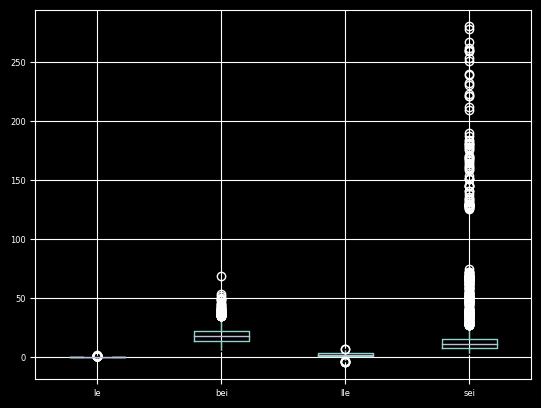

In [22]:
print("Number of values for Ligand Efficiency:",ligdf['le'].count(),"\n")
print("Number of values for Binding Efficiency Index:",ligdf.bei.count(),"\n")
print("Number of values for Lipophilic Ligand Efficiency:",ligdf.lle.count(),"\n")
print("Number of values for Surface Binding Efficiency Index:",ligdf.sei.count(),"\n")
ligeff = ligdf.boxplot(column=['le','bei','lle','sei'])

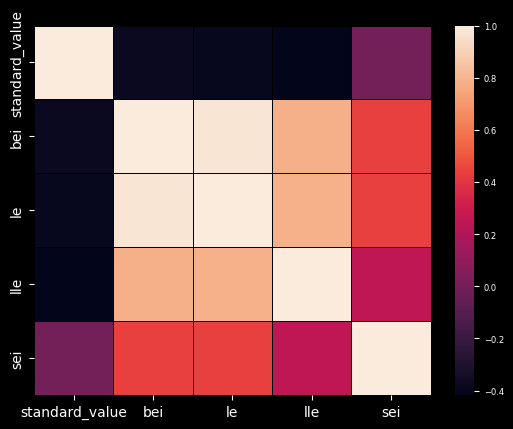

In [23]:
sns.heatmap(ligdf.drop(['molecule_chembl_id','canonical_smiles','Inhib_class'],axis=1).corr(),linecolor='black',linewidths=0.7)
plt.tick_params(labelsize =10)
plt.show()

From the heatmap above, we find that the IC<sub>50</sub> standard value of inhibition is negatively correlated with Ligand efficiency, Binding efficiency index and Lipophilic Ligand efficiency, and moderately correlated for Surface efficiency index.<br>
Ligand efficiency and Binding efficiency index are very well correlated to each other. The Scatter plot below shows this correlation.

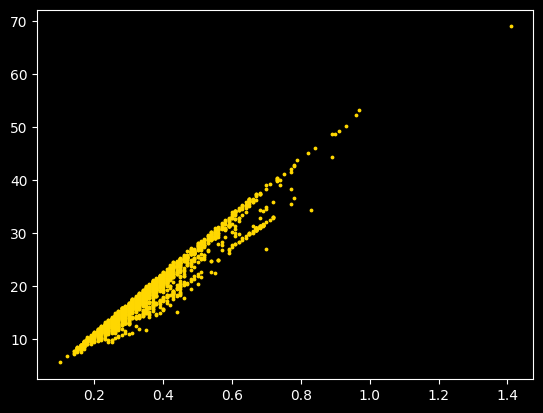

In [24]:
plt.scatter(ligdf['le'],ligdf['bei'],s=3,c='gold')
plt.tick_params(labelsize=10)
plt.show()

In [25]:
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 

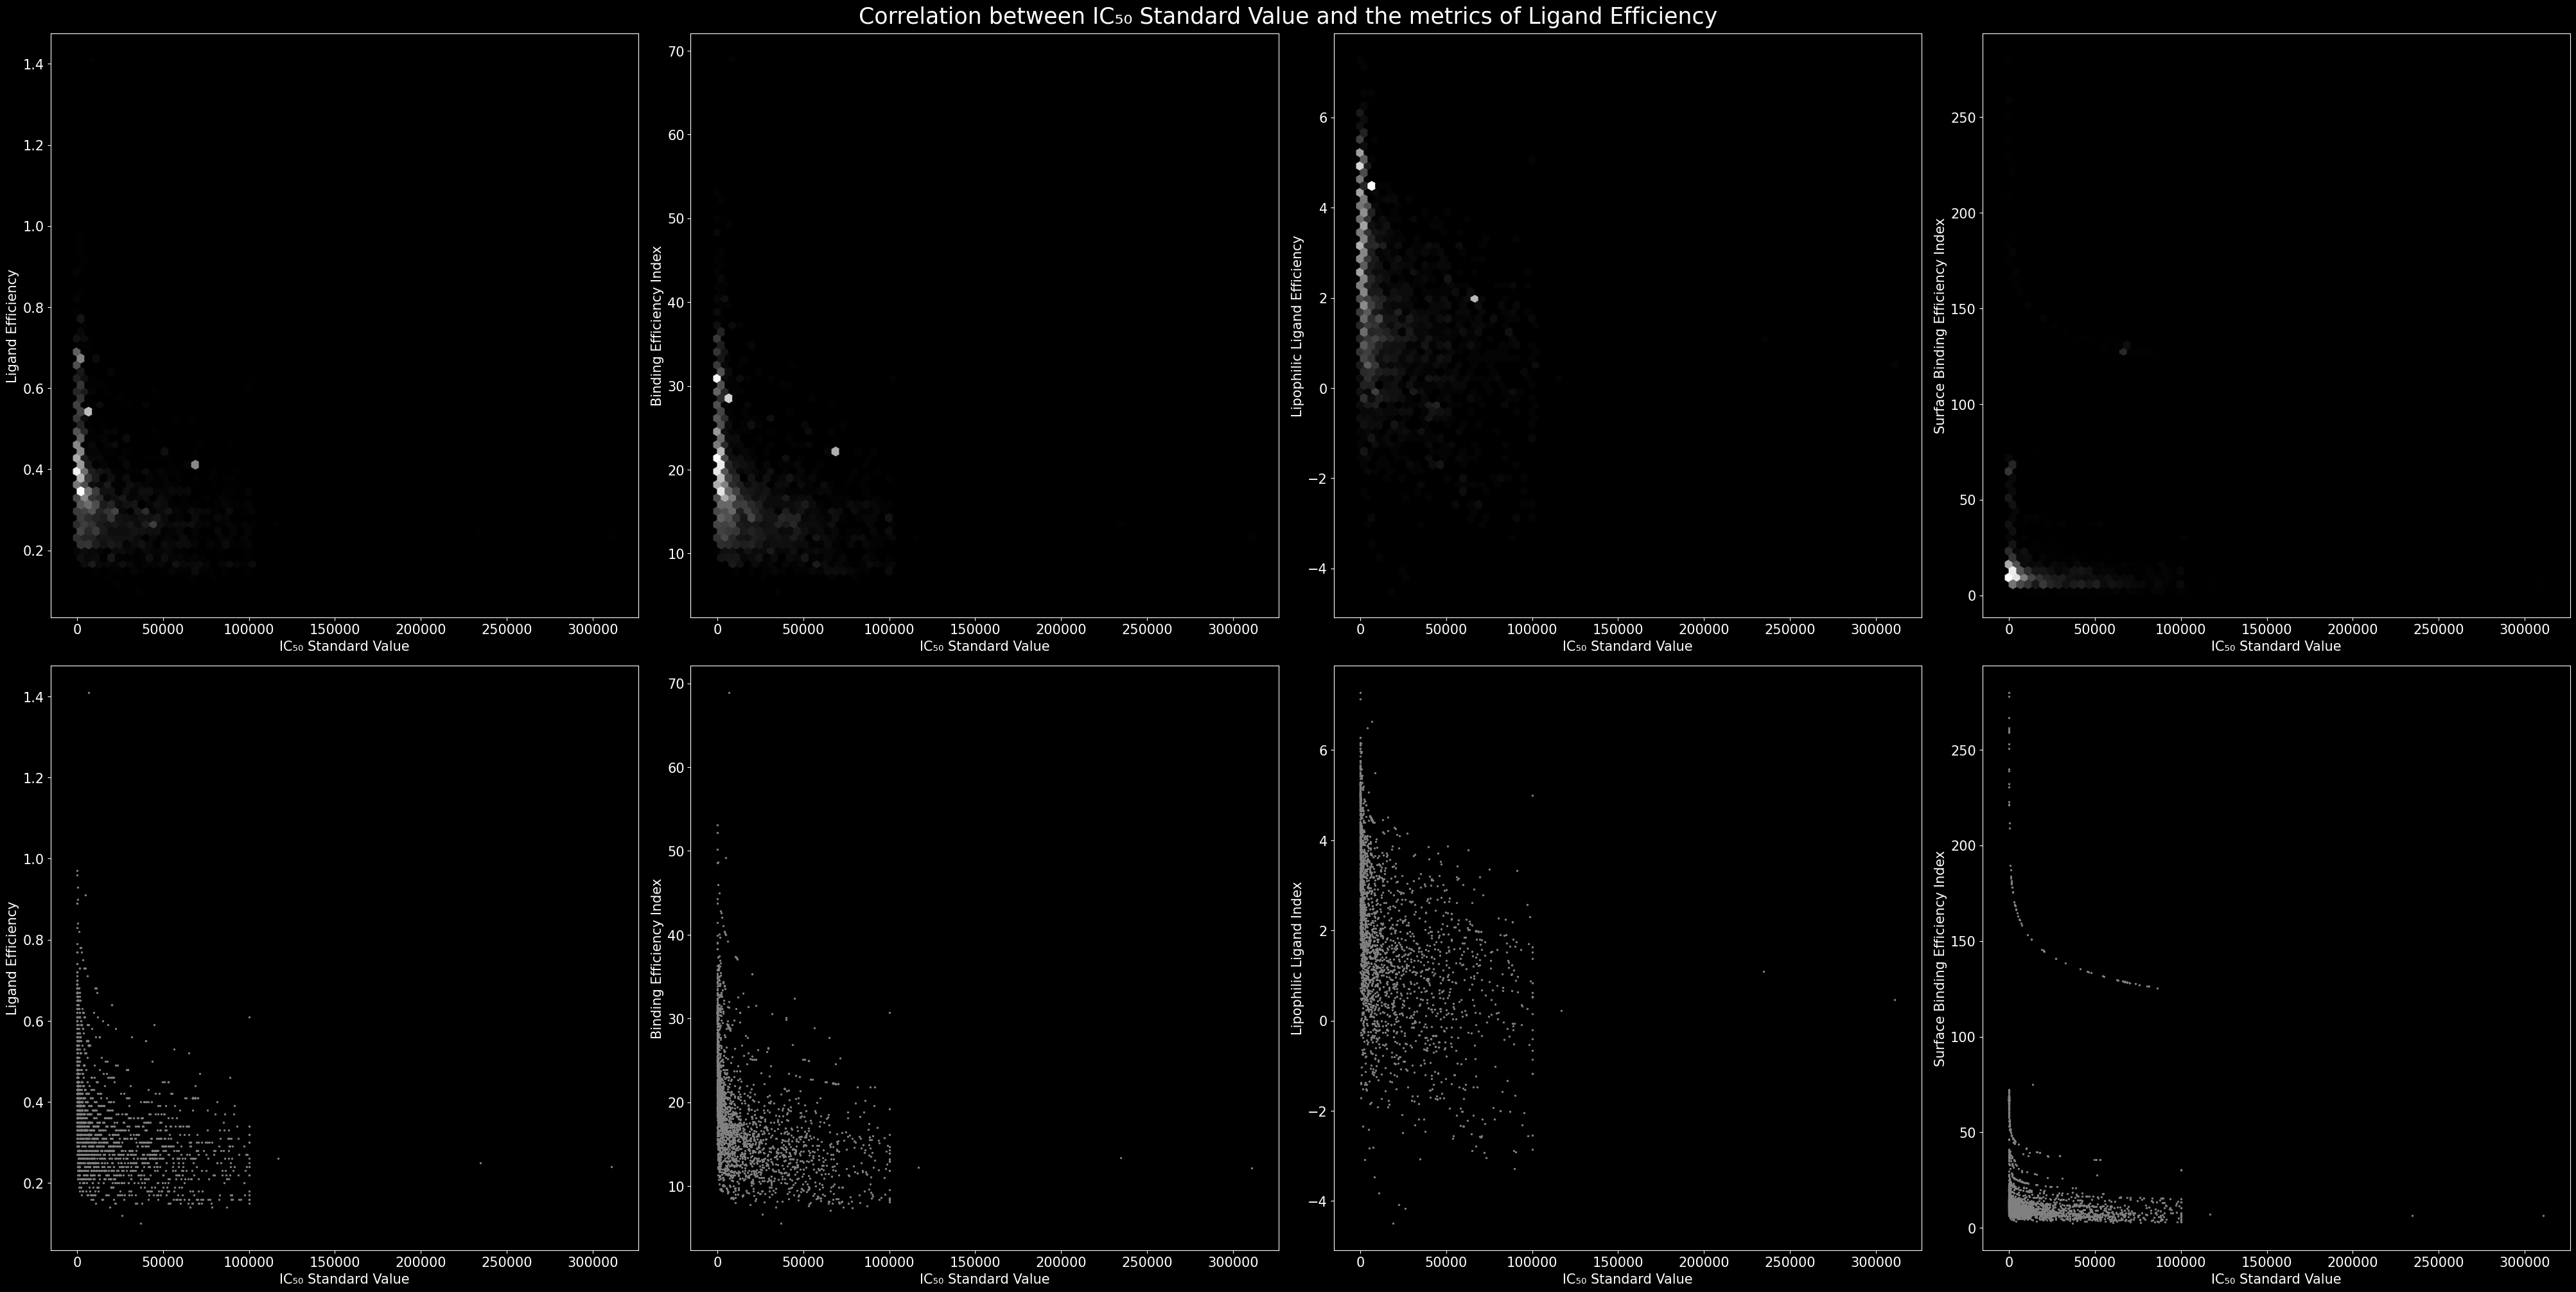

In [26]:
figs,axs = plt.subplots(2,4,figsize=(40,20),layout='constrained')
axs[0][0].hexbin(ligdf['standard_value'],ligdf['le'],cmap='gray',gridsize=70)
axs[0][0].set_xlabel('IC\u2085\u2080 Standard Value',fontsize=15)
axs[0][0].set_ylabel('Ligand Efficiency',fontsize=15)

axs[0][1].hexbin(ligdf['standard_value'],ligdf['bei'],cmap='gray',gridsize=70)
axs[0][1].set_xlabel('IC\u2085\u2080 Standard Value',fontsize=15)
axs[0][1].set_ylabel('Binding Efficiency Index',fontsize=15)

axs[0][2].hexbin(ligdf['standard_value'],ligdf['lle'],cmap='gray',gridsize=70)
axs[0][2].set_xlabel('IC\u2085\u2080 Standard Value',fontsize=15)
axs[0][2].set_ylabel('Lipophilic Ligand Efficiency',fontsize=15)

axs[0][3].hexbin(ligdf['standard_value'],ligdf['sei'],cmap='gray',gridsize=70)
axs[0][3].set_xlabel('IC\u2085\u2080 Standard Value',fontsize=15)
axs[0][3].set_ylabel('Surface Binding Efficiency Index',fontsize=15)

axs[1][0].scatter(ligdf['standard_value'],ligdf['le'],s=2,c='grey')
axs[1][0].set_xlabel('IC\u2085\u2080 Standard Value',fontsize=15)
axs[1][0].set_ylabel('Ligand Efficiency',fontsize=15)

axs[1][1].scatter(ligdf['standard_value'],ligdf['bei'],s=2,c='grey')
axs[1][1].set_xlabel('IC\u2085\u2080 Standard Value',fontsize=15)
axs[1][1].set_ylabel('Binding Efficiency Index',fontsize=15)

axs[1][2].scatter(ligdf['standard_value'],ligdf['lle'],s=2,c='grey')
axs[1][2].set_xlabel('IC\u2085\u2080 Standard Value',fontsize=15)
axs[1][2].set_ylabel('Lipophilic Ligand Index',fontsize=15)

axs[1][3].scatter(ligdf['standard_value'],ligdf['sei'],s=2,c='grey')
axs[1][3].set_xlabel('IC\u2085\u2080 Standard Value',fontsize=15)
axs[1][3].set_ylabel('Surface Binding Efficiency Index',fontsize=15)

figs.suptitle('Correlation between IC\u2085\u2080 Standard Value and the metrics of Ligand Efficiency',fontsize=25)
plt.show()

The above group of plots show the Hexbin (top) and Scatter (bottom) plots, that show the concentration of data and spread of data points respectively.

## Canonical SMILES Representation

Enter index of SMILES notation to view: 33

Canonical smiles of index 33: O=C(O)C1=Cc2cc(Cl)ccc2CC1=O

Shape of image: (300, 300, 3)



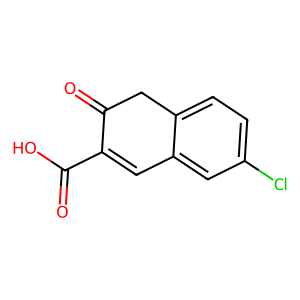

In [ ]:
i = int(input("Enter index of SMILES notation to view: "))
my_mol=Chem.MolFromSmiles(ligdf.canonical_smiles[i])
my_mol_with_H=Chem.AddHs(my_mol)
AllChem.EmbedMolecule(my_mol_with_H)
AllChem.MMFFOptimizeMolecule(my_mol_with_H)
my_embedded_mol = Chem.RemoveHs(my_mol_with_H)
#Save the molecule into an image
Draw.MolToFile(my_mol,'molecule.png')
#Save molecular rapresentation in mol files
fout = Chem.SDWriter('./charged_test.mol')
fout.write(my_embedded_mol)
fout.close()
print(f"\nCanonical smiles of index {i}: {ligdf['canonical_smiles'][i]}\n")
img = cv2.imread('molecule.png')
print(f"Shape of image: {img.shape}\n")
cv2_imshow(img)

## Calculation of Lipinski Descriptors

Lipinski Descriptors are physiochemical parameters set by Christopher A. Lipinski based on the Lipinski Rule of Five.It is used to evaluate the druglikeness of a substance. The rule is essential for describing the pharmacokinetic properties of a drug in the human body, like Absorption, Distribution, Metabolism and Excretion (ADME).<br>
The criteria of Lipinski's Rule of Five are the Lipinski Descriptors which are as follows:
* No more than 5 hydrogen donors (number of nitrogen-hydrogen and oxygen-hydrogen bonds)
* Molecular mass less than 500 Daltons
* No more than 10 hydrogen bond acceptors (all nitrogen or oxygen atoms)
* Octanol-water partition coefficient (log P) should not exceed 5.

In [27]:
def lipinski(smiles, verbose=False):
    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol) 
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    return descriptors

In [28]:
lipinsk = lipinski(ligdf.canonical_smiles).reset_index()
lipinsk

,index,MW,LogP,NumHDonors,NumHAcceptors
0,0,426.314,4.5945,1.0,4.0
1,1,305.765,2.9150,1.0,4.0
2,2,226.323,3.3220,0.0,2.0
3,3,305.765,2.9150,1.0,4.0
4,4,310.191,3.6709,1.0,3.0
...,...,...,...,...,...
2606,2606,220.184,0.9445,3.0,5.0
2607,2607,217.224,0.8604,3.0,3.0
2608,2608,217.268,1.6368,2.0,3.0
2609,2609,228.247,2.9738,3.0,3.0


In [29]:
ligdf.reset_index()

,index,molecule_chembl_id,standard_value,canonical_smiles,Inhib_class,bei,le,lle,sei
0,0,CHEMBL156630,5470.0,C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NCc3ccccc3)c(Br)c21,Intermediate,12.34,0.27,0.67,9.46
1,1,CHEMBL155754,1360.0,C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NC)c(Cl)c21,Intermediate,19.19,0.38,2.95,10.55
2,2,CHEMBL348083,30800.0,CC(C)/N=C1/CCc2c1n(C)c1ccccc21,Inactive,19.93,0.36,1.19,26.09
3,3,CHEMBL157182,22500.0,C/N=C1/CCc2c1n(C)c1cc(Cl)c(OC(=O)NC)cc21,Inactive,15.20,0.30,1.73,8.36
4,4,CHEMBL160347,180.0,COc1cc(Br)c2oc(C3CCNCC3)cc2c1,Active,21.74,0.51,3.07,19.61
...,...,...,...,...,...,...,...,...,...
2606,2618,CHEMBL5084419,3400.0,O=c1[nH]nc(/C=C/c2ccc(O)c(O)c2)o1,Intermediate,24.84,0.47,4.53,5.50
2607,2619,CHEMBL4284618,47000.0,C#CCNC(=O)/C=C/c1ccc(O)c(O)c1,Inactive,19.92,0.37,3.47,6.22
2608,2620,CHEMBL5077905,30300.0,C#CCNC/C=C/c1ccc(O)c(OC)c1,Inactive,20.80,0.39,2.88,10.89
2609,2621,CHEMBL165,4540.0,Oc1ccc(/C=C/c2cc(O)cc(O)c2)cc1,Intermediate,23.41,0.43,2.37,8.80


In [30]:
ligdf = pd.concat([ligdf.reset_index(),lipinsk],axis=1)

In [31]:
ligdf = pd.concat([ligdf.drop('Inhib_class',axis=1),ligdf.Inhib_class],axis=1)

In [32]:
ligdf = ligdf.drop('index',axis=1)

In [33]:
ligdf.head()

,molecule_chembl_id,standard_value,canonical_smiles,bei,le,lle,sei,MW,LogP,NumHDonors,NumHAcceptors,Inhib_class
0,CHEMBL156630,5470.0,C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NCc3ccccc3)c(Br)c21,12.34,0.27,0.67,9.46,426.314,4.5945,1.0,4.0,Intermediate
1,CHEMBL155754,1360.0,C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NC)c(Cl)c21,19.19,0.38,2.95,10.55,305.765,2.9150,1.0,4.0,Intermediate
2,CHEMBL348083,30800.0,CC(C)/N=C1/CCc2c1n(C)c1ccccc21,19.93,0.36,1.19,26.09,226.323,3.3220,0.0,2.0,Inactive
3,CHEMBL157182,22500.0,C/N=C1/CCc2c1n(C)c1cc(Cl)c(OC(=O)NC)cc21,15.20,0.30,1.73,8.36,305.765,2.9150,1.0,4.0,Inactive
4,CHEMBL160347,180.0,COc1cc(Br)c2oc(C3CCNCC3)cc2c1,21.74,0.51,3.07,19.61,310.191,3.6709,1.0,3.0,Active


Now it's time to convert IC50 into a more normalized format, pIC50 which is the negative logarithm of IC50.<br>

We first convert the values' units from nanomolars to molars.<br>
**M = 10<sup>9</sup>nM<br>**
Once we do that, we then apply the negative logarithm to the molar values.<br>
***pIC<sub>50</sub> = - (log(IC<sub>50</sub>))***<br>
Since we convert the original values down to a logarithmic scale, we can normalize the values to a reasonable amount. In the plots given below.

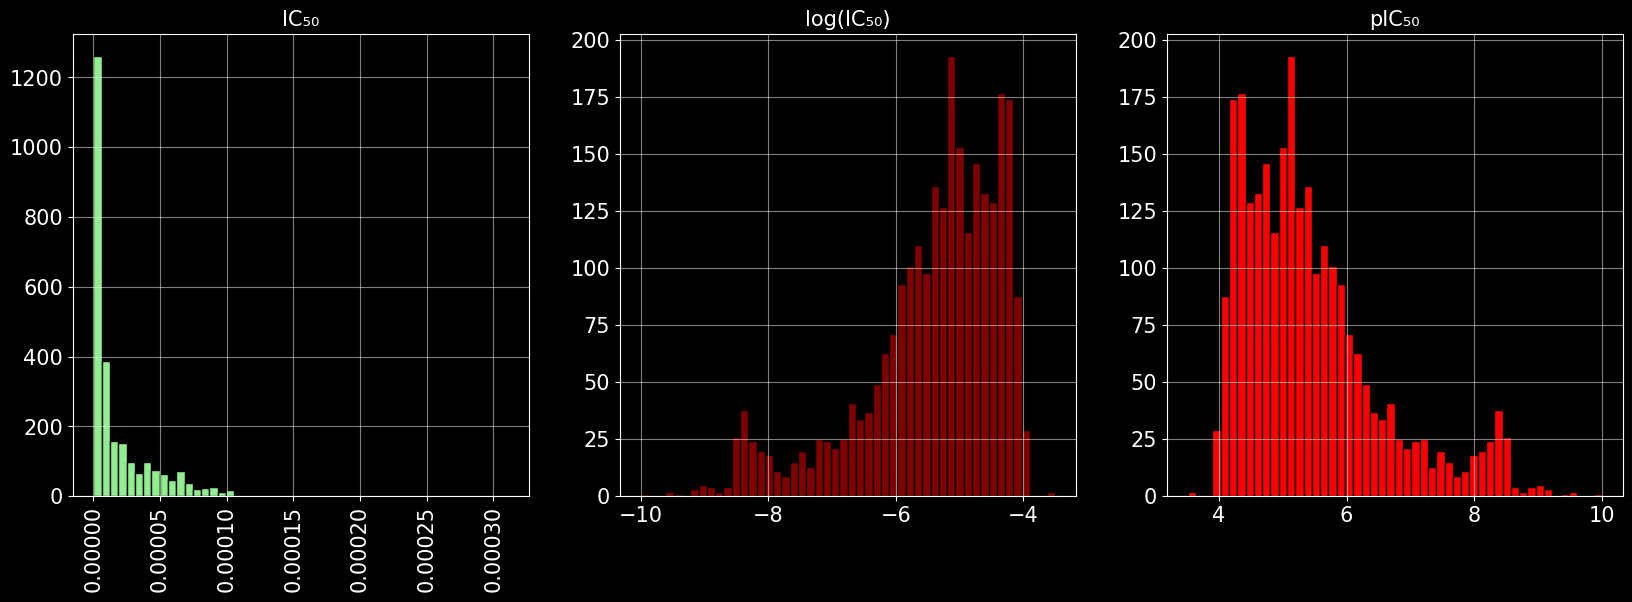

In [34]:
figs,axs = plt.subplots(1,3,figsize=(20,6))
axs[0].hist(ligdf['standard_value']*(10**-9),bins=50,color='lightgreen',edgecolor='k'),axs[0].tick_params(axis='x',rotation=90),axs[0].grid(alpha=0.5),axs[0].set_title("IC\u2085\u2080",fontsize=15)
axs[1].hist(pd.DataFrame(map(math.log10,ligdf['standard_value']*(10**-9))),bins=50,color='maroon',edgecolor='k'),axs[1].grid(alpha=0.5),axs[1].set_title("log(IC\u2085\u2080)",fontsize=15)
axs[2].hist(-1*pd.DataFrame(map((math.log10),ligdf['standard_value']*(10**-9))),bins=50,color='red',edgecolor='k'),axs[2].grid(alpha=0.5),axs[2].set_title("pIC\u2085\u2080",fontsize=15)
plt.show()

In [35]:
ligdf['pIC50'] = -1*pd.DataFrame(map(math.log10,((10**-9)*ligdf['standard_value'])),index=ligdf['standard_value'].index)
ligdf.head()

,molecule_chembl_id,standard_value,canonical_smiles,bei,le,lle,sei,MW,LogP,NumHDonors,NumHAcceptors,Inhib_class,pIC50
0,CHEMBL156630,5470.0,C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NCc3ccccc3)c(Br)c21,12.34,0.27,0.67,9.46,426.314,4.5945,1.0,4.0,Intermediate,5.262013
1,CHEMBL155754,1360.0,C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NC)c(Cl)c21,19.19,0.38,2.95,10.55,305.765,2.9150,1.0,4.0,Intermediate,5.866461
2,CHEMBL348083,30800.0,CC(C)/N=C1/CCc2c1n(C)c1ccccc21,19.93,0.36,1.19,26.09,226.323,3.3220,0.0,2.0,Inactive,4.511449
3,CHEMBL157182,22500.0,C/N=C1/CCc2c1n(C)c1cc(Cl)c(OC(=O)NC)cc21,15.20,0.30,1.73,8.36,305.765,2.9150,1.0,4.0,Inactive,4.647817
4,CHEMBL160347,180.0,COc1cc(Br)c2oc(C3CCNCC3)cc2c1,21.74,0.51,3.07,19.61,310.191,3.6709,1.0,3.0,Active,6.744727


In [36]:
def swapColumns(df, col1, col2):
    cols = df.columns
    col1_idx = cols.get_loc(col1)
    col2_idx = cols.get_loc(col2)
    df[[cols[col1_idx], cols[col2_idx]]] = df[[cols[col2_idx], cols[col1_idx]]]
    df.rename(columns = {col1:col2, col2:col1}, inplace = True)

In [37]:
swapColumns(ligdf,'Inhib_class','pIC50')

In [38]:
ligdf.head()

,molecule_chembl_id,standard_value,canonical_smiles,bei,le,lle,sei,MW,LogP,NumHDonors,NumHAcceptors,pIC50,Inhib_class
0,CHEMBL156630,5470.0,C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NCc3ccccc3)c(Br)c21,12.34,0.27,0.67,9.46,426.314,4.5945,1.0,4.0,5.262013,Intermediate
1,CHEMBL155754,1360.0,C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NC)c(Cl)c21,19.19,0.38,2.95,10.55,305.765,2.9150,1.0,4.0,5.866461,Intermediate
2,CHEMBL348083,30800.0,CC(C)/N=C1/CCc2c1n(C)c1ccccc21,19.93,0.36,1.19,26.09,226.323,3.3220,0.0,2.0,4.511449,Inactive
3,CHEMBL157182,22500.0,C/N=C1/CCc2c1n(C)c1cc(Cl)c(OC(=O)NC)cc21,15.20,0.30,1.73,8.36,305.765,2.9150,1.0,4.0,4.647817,Inactive
4,CHEMBL160347,180.0,COc1cc(Br)c2oc(C3CCNCC3)cc2c1,21.74,0.51,3.07,19.61,310.191,3.6709,1.0,3.0,6.744727,Active


In [39]:
ligdf['pIC50'].describe()

count    2611.000000
mean        5.427764
std         1.108002
min         3.507379
25%         4.603801
50%         5.183096
75%         5.908334
max        10.000000
Name: pIC50, dtype: float64

In [40]:
ligdf.dtypes

molecule_chembl_id     object
standard_value        float64
canonical_smiles       object
bei                   float64
le                    float64
lle                   float64
sei                   float64
MW                    float64
LogP                  float64
NumHDonors            float64
NumHAcceptors         float64
pIC50                 float64
Inhib_class            object
dtype: object

Now that we have changed the IC<sub>50</sub> values to pIC<sub>50</sub> values, described the distribution of the values, and represented the data types of all features in the current dataset, more insights need to be drawn from the data.<br><br>Following shows how the different drugs/compounds are scattered through Molar Weight vs Octanol-Water Partition Coefficient relationship.

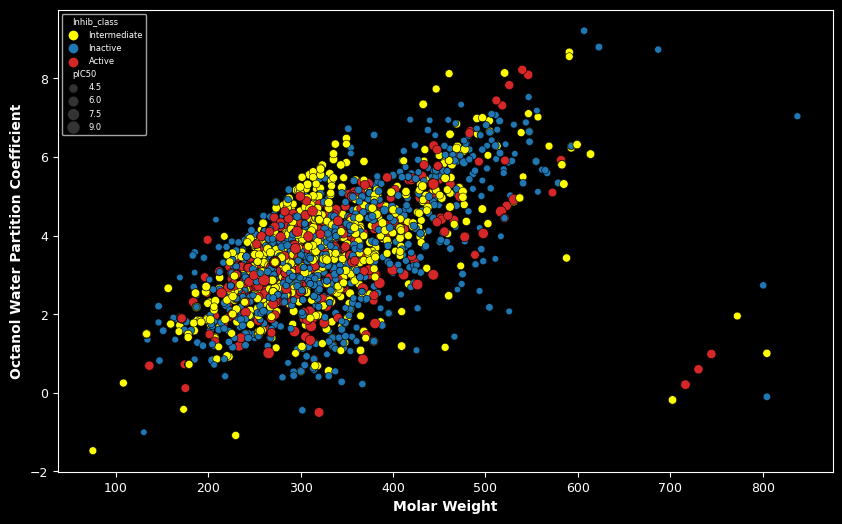

In [41]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='MW',y='LogP',data=ligdf,size='pIC50',hue='Inhib_class',edgecolor='k',palette=["yellow","tab:blue","tab:red"])
plt.xlabel('Molar Weight',fontsize=10,fontweight='bold'),plt.ylabel('Octanol Water Partition Coefficient',fontsize=10,fontweight='bold')
plt.tick_params(labelsize=9)
plt.show()

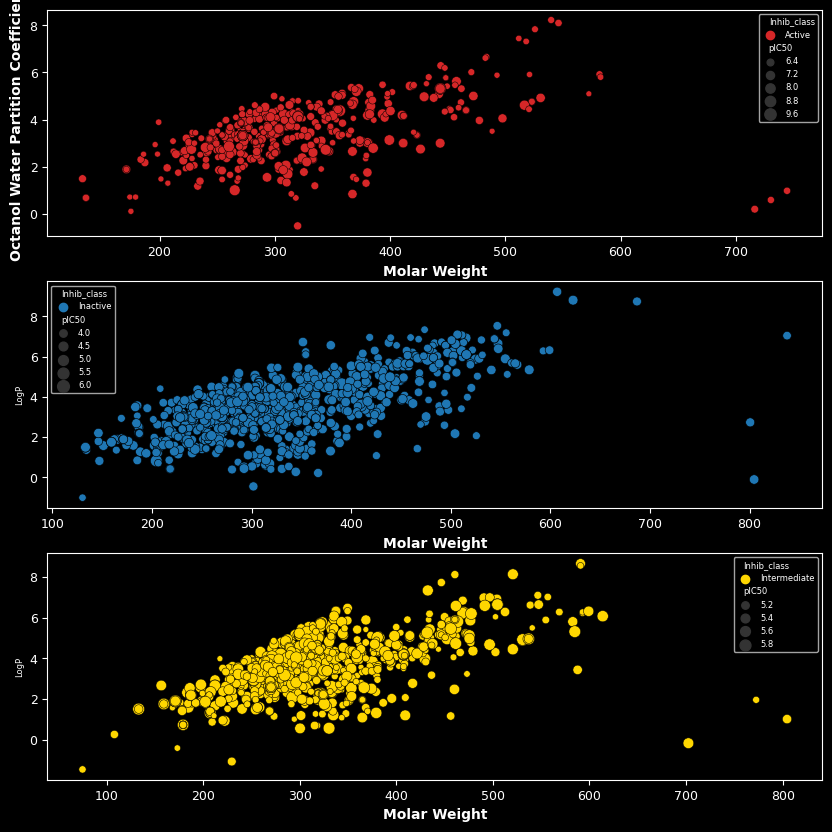

In [116]:
scfig,scax = plt.subplots(3,1,figsize=(10,10))
sns.scatterplot(x='MW',y='LogP',data=ligdf[ligdf['Inhib_class']=='Active'],size='pIC50',hue='Inhib_class',edgecolor='k',palette=["tab:red"],ax=scax[0])
scax[0].set_xlabel('Molar Weight',fontsize=10,fontweight='bold'),scax[0].set_ylabel('Octanol Water Partition Coefficient',fontsize=10,fontweight='bold')
scax[0].tick_params(axis='both',labelsize=9)
sns.scatterplot(x='MW',y='LogP',data=ligdf[ligdf['Inhib_class']=='Inactive'],size='pIC50',hue='Inhib_class',edgecolor='k',palette=["tab:blue"],ax=scax[1])
scax[1].set_xlabel('Molar Weight',fontsize=10,fontweight='bold'),scax[0].set_ylabel('Octanol Water Partition Coefficient',fontsize=10,fontweight='bold')
scax[1].tick_params(axis='both',labelsize=9)
sns.scatterplot(x='MW',y='LogP',data=ligdf[ligdf['Inhib_class']=='Intermediate'],size='pIC50',hue='Inhib_class',edgecolor='k',palette=["gold"],ax=scax[2])
scax[2].set_xlabel('Molar Weight',fontsize=10,fontweight='bold'),scax[0].set_ylabel('Octanol Water Partition Coefficient',fontsize=10,fontweight='bold')
scax[2].tick_params(axis='both',labelsize=9)

Since the above scatter plots doesnt show much distinction between the three types of compounds, we have to represent the data in other forms of visualizations in order to better understand it.<br><br>Now below shows a correlation heat map that represent feature correlation. As demonstrated, we find that the ligand and lipophilic ligand efficiencies are correlated positively as already demonstrated before.<br><br>Same goes with binding efficiency index with highly positive correlation and surface efficiency index with moderately positive correlation.<br><br>Now we can find some more interesting insights, such as the moderate positive correlation between the Molar Weight and Number of Hydrogen Acceptors. Similiar correlations can be seen with Molar Weight and the Octanol-Water Partition coefficient.<br><br>Another crucial insight we can draw from the data is that Octanol-Water Partition coefficient is negatively correlated with Lipophilic Ligand efficiency and Lipophilic Ligand efficiency is well correlated with pIC<sub>50</sub>.<br><br>This is crucial to note as Octanol-Water Partition coefficient is used to represent the solubility of compounds in fat-like solvents, more the number, more it is likely to form solutions with fat solvents.<br><br>
Lipophilic Ligand Efficiency is determined by the following formula:<br><br>
&emsp;&emsp;&emsp;&emsp;***LiPE = pIC<sub>50</sub> - logP***<br><br>where ***LiPE*** = Lipophilic Ligand Efficiency<br>
***pIC<sub>50</sub>*** = Negative Logarithm of Half Maximal Inhibitory Concentration<br>
***logP*** = Partition coefficient between two immiscible solvents, in this case, Water and Octanol (fatty alchohol)

<ipython-input-42-e61cd02fac15>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(ligdf.corr(),linewidths=0.7,linecolor='black')


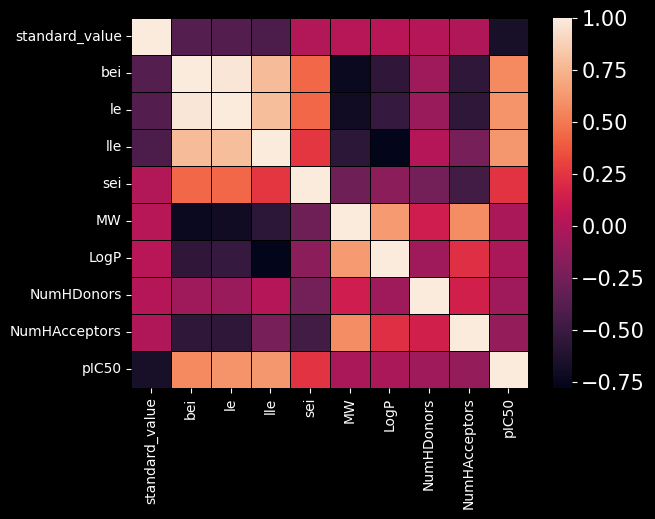

In [42]:
sns.heatmap(ligdf.corr(),linewidths=0.7,linecolor='black')
plt.tick_params(labelsize=10)
plt.show()

In [43]:
binary = ligdf[ligdf['Inhib_class']!='Intermediate']
binary.head()

,molecule_chembl_id,standard_value,canonical_smiles,bei,le,lle,sei,MW,LogP,NumHDonors,NumHAcceptors,pIC50,Inhib_class
2,CHEMBL348083,30800.0,CC(C)/N=C1/CCc2c1n(C)c1ccccc21,19.93,0.36,1.19,26.09,226.323,3.3220,0.0,2.0,4.511449,Inactive
3,CHEMBL157182,22500.0,C/N=C1/CCc2c1n(C)c1cc(Cl)c(OC(=O)NC)cc21,15.20,0.30,1.73,8.36,305.765,2.9150,1.0,4.0,4.647817,Inactive
4,CHEMBL160347,180.0,COc1cc(Br)c2oc(C3CCNCC3)cc2c1,21.74,0.51,3.07,19.61,310.191,3.6709,1.0,3.0,6.744727,Active
6,CHEMBL348607,750.0,CCCCNC(=O)Oc1ccc2c(c1Br)c1c(n2C)/C(=N\C)CC1,15.61,0.35,1.93,11.01,392.297,4.1944,1.0,4.0,6.124939,Active
8,CHEMBL156931,13600.0,C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NC)cc21,17.94,0.33,2.61,8.75,271.320,2.2616,1.0,4.0,4.866461,Inactive


We can take off the intermediate class as the range of IC<sub>50</sub> values lying in the intermediate range or the intermediately active drugs are not of much use. We want to be able to classify bioactive drugs for MAO-A from bio-inactive drugs. Below shows the number of observations collected for active and inactive drugs.

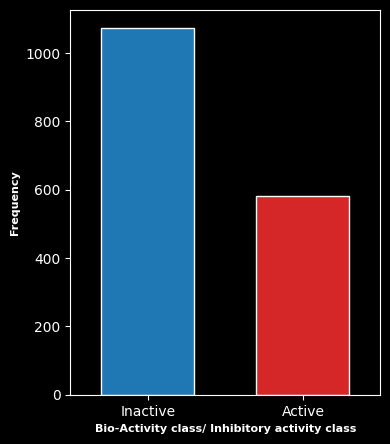

In [44]:
plt.figure(figsize=(4,5))
sns.countplot(x='Inhib_class',data=binary,width=0.6,saturation=5,edgecolor='white',palette=['tab:blue','tab:red'])
plt.xlabel('Bio-Activity class/ Inhibitory activity class',fontsize=8,fontweight='bold')
plt.ylabel('Frequency',fontsize=8,fontweight='bold')
plt.tick_params(labelsize=10)
plt.show()

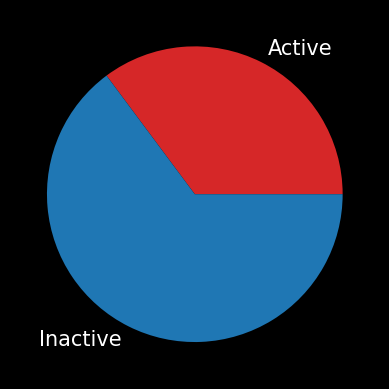

In [81]:
labz = ['Active', 'Inactive']
colZ = ['tab:red','tab:blue']
plt.pie([len(df[df['Inhib_class']=='Active']),len(df[df['Inhib_class']=='Inactive'])],labels = labz, colors= colZ)
plt.rcParams['font.size'] = 6
plt.show()

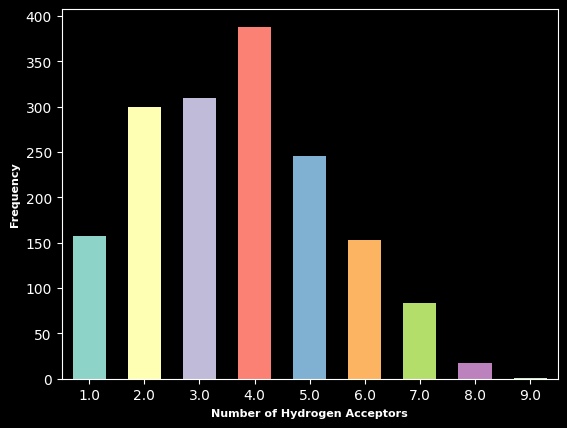

In [97]:
sns.countplot(x='NumHAcceptors',data=binary,width=0.6,saturation=10)
plt.xlabel('Number of Hydrogen Acceptors',fontsize=8,fontweight='bold')
plt.ylabel('Frequency',fontsize=8,fontweight='bold')
plt.tick_params(labelsize=10)
plt.show()

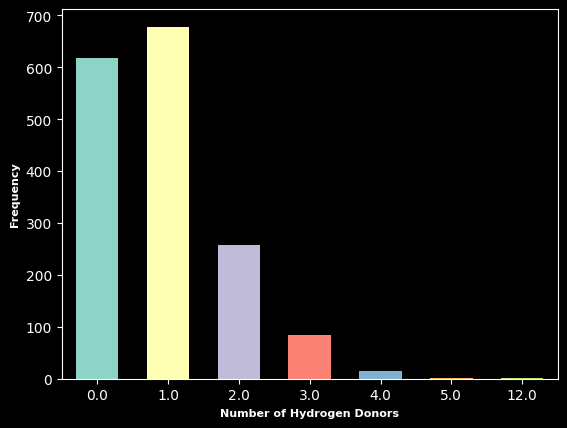

In [98]:
sns.countplot(x='NumHDonors',data=binary,width=0.6,saturation=10)
plt.xlabel('Number of Hydrogen Donors',fontsize=8,fontweight='bold')
plt.ylabel('Frequency',fontsize=8,fontweight='bold')
plt.tick_params(labelsize=10)
plt.show()

Let us plot a scatter plot for Lipophilic Ligand Coefficient against Octanol-Water Partition coefficient and against pIC<sub>50</sub> to see if the relation can represent it's correlation through our data.

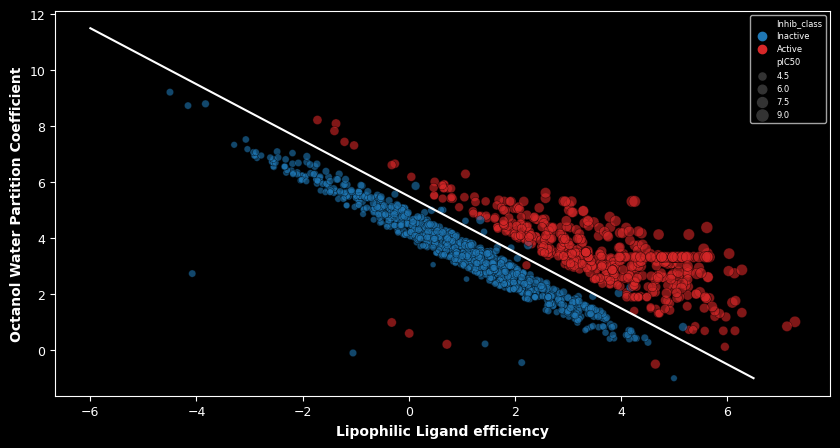

In [45]:
x=np.arange(-6,7,0.5)
y=np.arange(11.5,-1.5,-0.5)
plt.figure(figsize=(10,5))
sns.scatterplot(x='lle',y='LogP',data=binary,size='pIC50',hue='Inhib_class',edgecolor='k',palette=["tab:blue","tab:red"],alpha=0.6)
plt.plot(x,y,c='white')
plt.xlabel('Lipophilic Ligand efficiency',fontsize=10,fontweight='bold'),plt.ylabel('Octanol Water Partition Coefficient',fontsize=10,fontweight='bold')
plt.tick_params(labelsize=9)
plt.legend()
plt.show()

As you can see, there is a clear seperation between the data in terms of bioactive and bio-inactive compounds against MAO-A, with the exception of very few outliers. This can account for the relation     ***LiPE = pIC<sub>50</sub> - logP***.<br>Given below is a linear plot representation of the same relationship.

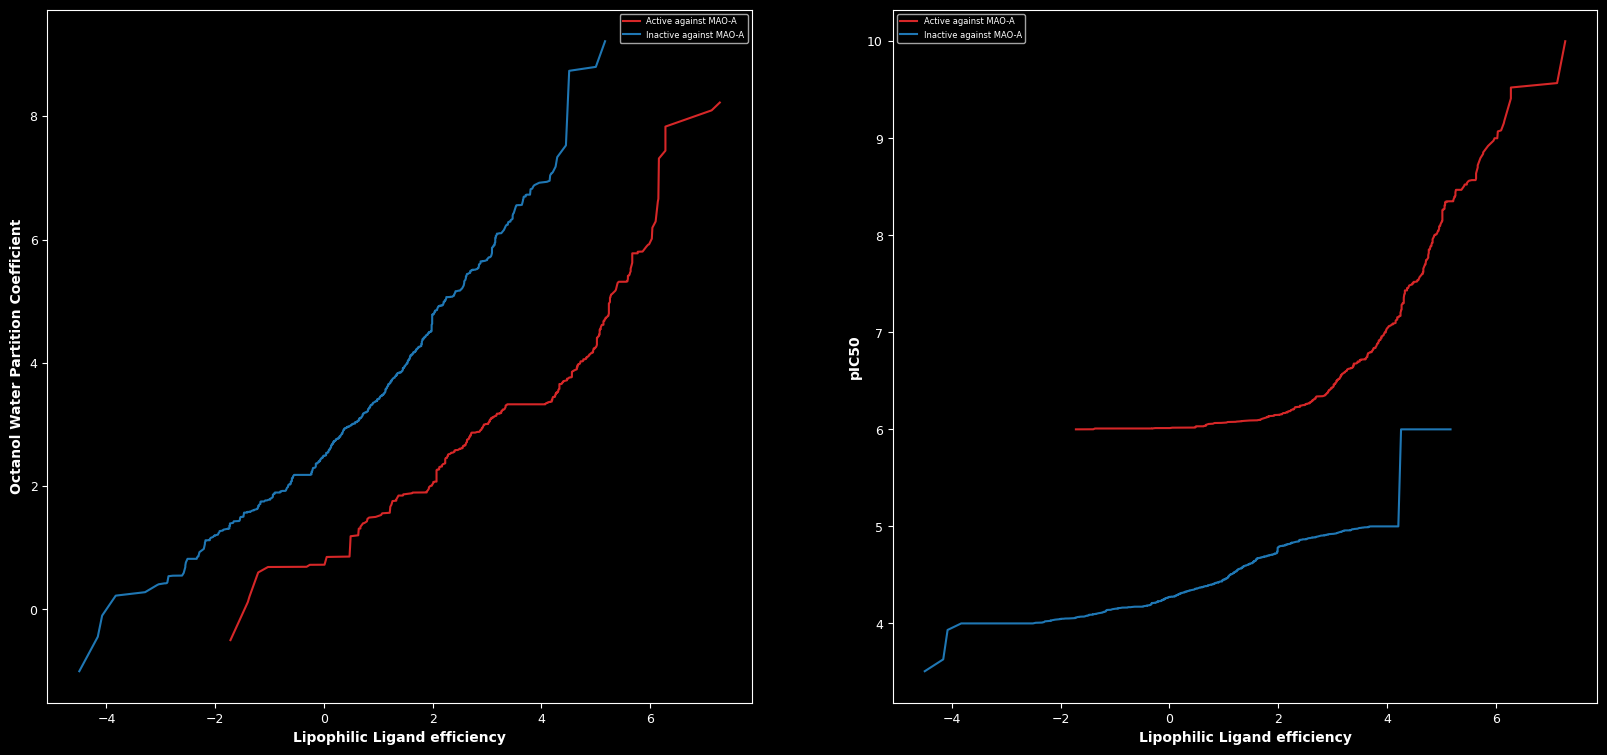

In [46]:
ligler = sorted(np.array(binary.loc[binary['Inhib_class'] == 'Active']['lle']))
octlogr = sorted(np.array(binary.loc[binary['Inhib_class'] == 'Active']['LogP']))
ligleb = sorted(np.array(binary.loc[binary['Inhib_class'] == 'Inactive']['lle']))
octlogb = sorted(np.array(binary.loc[binary['Inhib_class'] == 'Inactive']['LogP']))
picr = sorted(np.array(binary.loc[binary['Inhib_class'] == 'Active']['pIC50']))
picb = sorted(np.array(binary.loc[binary['Inhib_class'] == 'Inactive']['pIC50']))
lifig,liax = plt.subplots(1,2,figsize=(20,9))
liax[0].plot(ligler,octlogr,color='tab:red',label='Active against MAO-A')
liax[0].plot(ligleb,octlogb,color='tab:blue',label='Inactive against MAO-A')
liax[0].set_xlabel('Lipophilic Ligand efficiency',fontsize=10,fontweight='bold'),liax[0].set_ylabel('Octanol Water Partition Coefficient',fontsize=10,fontweight='bold')
liax[0].tick_params(labelsize=9)
liax[0].legend()
liax[1].plot(ligler,picr,color='tab:red',label='Active against MAO-A')
liax[1].plot(ligleb,picb,color='tab:blue',label='Inactive against MAO-A')
liax[1].set_xlabel('Lipophilic Ligand efficiency',fontsize=10,fontweight='bold'),liax[1].set_ylabel('pIC50',fontsize=10,fontweight='bold')
liax[1].tick_params(labelsize=9)
liax[1].legend()

Now another scatter plot is plotted to see any distinction between inactive and active inhibition drugs can be seen for the Molar weight vs Octanol-Water Partition Coefficient relationship.

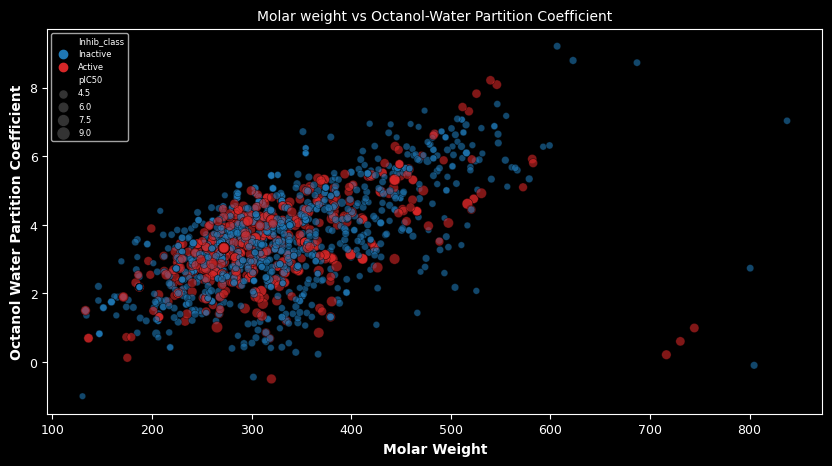

In [102]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='MW',y='LogP',data=binary,size='pIC50',hue='Inhib_class',edgecolor='k',palette=["tab:blue","tab:red"],alpha=0.6)
plt.xlabel('Molar Weight',fontsize=10,fontweight='bold'),plt.ylabel('Octanol Water Partition Coefficient',fontsize=10,fontweight='bold')
plt.tick_params(labelsize=9)
plt.legend()
plt.title('Molar weight vs Octanol-Water Partition Coefficient',fontsize=10)
plt.show()

This relation doesnt seem to show as much of distinction as compared to the previous scatter plot. This shows that Molar weight may not be a viable indicator of bio-activity.<br>Let us try plotting as a linear plot to see if we can find something more insightful.

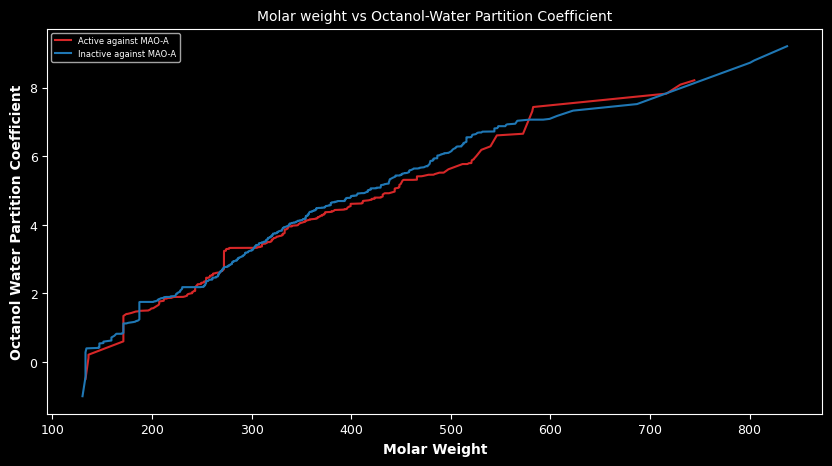

In [103]:
mwr = sorted(np.array(binary.loc[binary['Inhib_class'] == 'Active']['MW']))
octlogr = sorted(np.array(binary.loc[binary['Inhib_class'] == 'Active']['LogP']))
mwb = sorted(np.array(binary.loc[binary['Inhib_class'] == 'Inactive']['MW']))
octlogb = sorted(np.array(binary.loc[binary['Inhib_class'] == 'Inactive']['LogP']))
plt.figure(figsize=(10,5))
plt.plot(mwr,octlogr,color='tab:red',label='Active against MAO-A')
plt.plot(mwb,octlogb,color='tab:blue',label='Inactive against MAO-A')
plt.xlabel('Molar Weight',fontsize=10,fontweight='bold'),plt.ylabel('Octanol Water Partition Coefficient',fontsize=10,fontweight='bold')
plt.tick_params(labelsize=9)
plt.legend()
plt.title('Molar weight vs Octanol-Water Partition Coefficient',fontsize=10)
plt.show()

As shown in this linear plot, the relationship between Molar Weight and Octanol water partition coefficient does not very well differentiate the activity of the compounds against MAO-A. Similiar trends are seen in both compounds.<br><br>Concentration of data points can however be drawn to see where the data is plotted the most. A new plot is made by overlapping the scatter of points with a bivariate histogram and a kernel density estimate plot. This will demonstrate the density of points across the Molar weight vs Octanol-water partition coefficient relationship space while showing kernel based distributions of the two classes of compounds.

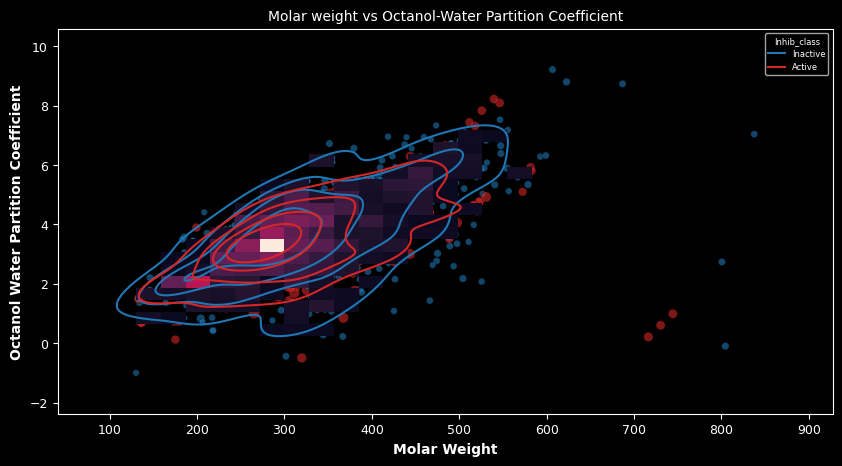

In [101]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='MW',y='LogP',data=binary,size='pIC50',hue='Inhib_class',edgecolor='k',palette=["tab:blue","tab:red"],alpha=0.6)
sns.kdeplot(data=binary,x="MW",y="LogP",hue="Inhib_class",thresh=.1,linewidths=1.5,palette=["tab:blue","tab:red"],levels=5)
sns.histplot(data=binary,x="MW", y="LogP", bins=25, pthresh=.05, cmap="rocket")
plt.xlabel('Molar Weight',fontsize=10,fontweight='bold'),plt.ylabel('Octanol Water Partition Coefficient',fontsize=10,fontweight='bold')
plt.tick_params(labelsize=9)
plt.title('Molar weight vs Octanol-Water Partition Coefficient',fontsize=10)
plt.show()

The following shows a similiar plot visualization but this time, we plot randomly chosen points from a multivariate gaussian distribution created from the features Molar Weight and Octanol-Water Partition Coefficient.

Mean Vector:
[320.25473337   3.52013182]

Standard Deviation Vector:
[8.34381060e+03 1.86442097e+00]

Covariance Matrix:
[[8.34885828e+03 7.65239523e+01]
 [7.65239523e+01 1.86554887e+00]]



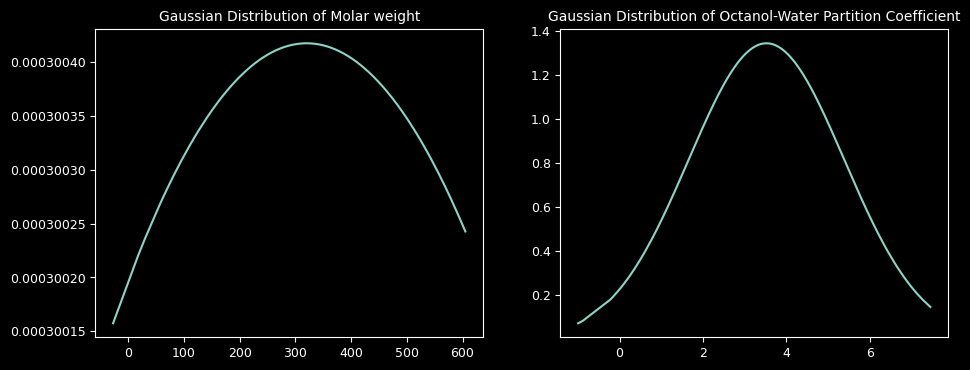

In [50]:
mean=np.array(binary[['MW','LogP']].mean())
stddev = np.array(((binary[['MW','LogP']]-mean)**2).sum()/len(binary))
covs = np.cov(binary[['MW','LogP']].T)
print(f"Mean Vector:\n{mean}\n")
print(f"Standard Deviation Vector:\n{stddev}\n")
print(f"Covariance Matrix:\n{covs}\n")
rng = np.random.RandomState(0)
x, y = rng.multivariate_normal(mean, covs, len(binary)).T
gfig,gaxs = plt.subplots(1,2,figsize=(11,4))
gaxs[0].plot(sorted(x),(1/stddev[0]*(math.sqrt(2*math.pi)))*np.exp((((sorted(x)-mean[0])/stddev[0])**2)*(-1/2)))
gaxs[0].set_title('Gaussian Distribution of Molar weight',fontsize=10)
gaxs[0].tick_params(labelsize=9)
gaxs[1].plot(sorted(y),(1/stddev[1]*(math.sqrt(2*math.pi)))*np.exp((((sorted(y)-mean[1])/stddev[1])**2)*(-1/2)))
gaxs[1].set_title('Gaussian Distribution of Octanol-Water Partition Coefficient',fontsize=10)
gaxs[1].tick_params(labelsize=9)

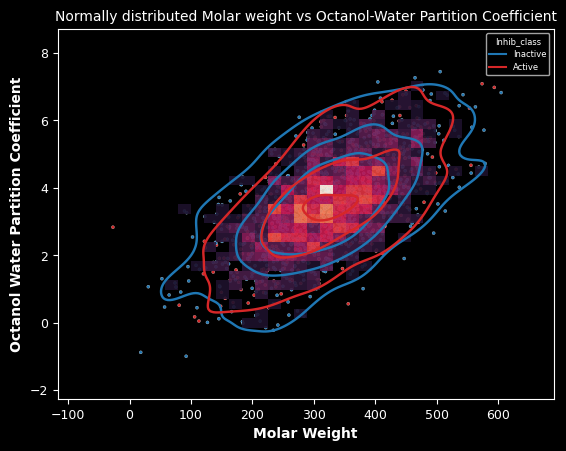

In [100]:
sns.scatterplot(data=binary,x=x, y=y, s=5, hue='Inhib_class',palette=["tab:blue","tab:red"])
sns.histplot(data=binary,x=x, y=y, bins=30, pthresh=.05,cmap="rocket",alpha=0.9)
sns.kdeplot(data=binary,x=x, y=y, levels=4, color="w", linewidths=1.75,hue='Inhib_class',palette=["tab:blue","tab:red"])
plt.tick_params(labelsize=9)
plt.xlabel('Molar Weight',fontsize=10,fontweight='bold'),plt.ylabel('Octanol Water Partition Coefficient',fontsize=10,fontweight='bold')
plt.title('Normally distributed Molar weight vs Octanol-Water Partition Coefficient',fontsize=10)
plt.show()

From the Lipinski Rule of 5, Octanol-Water Partition Coefficient and needs to be less than 5 and Number of Hydrogen Acceptors must be less than 10 for drug-like behaviour.

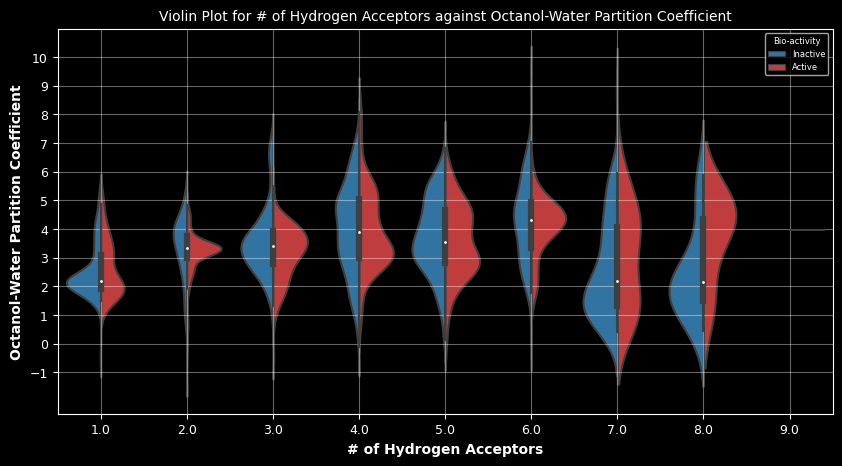

In [52]:
plt.figure(figsize=(10,5))
sns.violinplot(x='NumHAcceptors',y='LogP',data=binary,size='pIC50',hue='Inhib_class',edgecolor='k',palette=["tab:blue","tab:red"],split=True)
plt.xlabel('# of Hydrogen Acceptors',fontsize=10,fontweight='bold'),plt.ylabel('Octanol-Water Partition Coefficient',fontsize=10,fontweight='bold')
plt.tick_params(labelsize=9)
plt.legend(title="Bio-activity")
plt.yticks(np.arange(-1,11,1))
plt.grid(alpha=0.4)
plt.title('Violin Plot for # of Hydrogen Acceptors against Octanol-Water Partition Coefficient',fontsize=10)
plt.show()

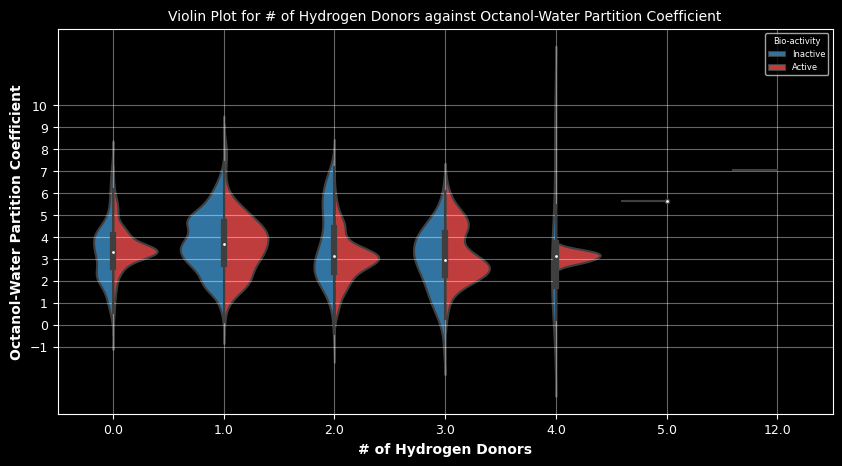

In [53]:
plt.figure(figsize=(10,5))
sns.violinplot(x='NumHDonors',y='LogP',data=binary,size='pIC50',hue='Inhib_class',edgecolor='k',palette=["tab:blue","tab:red"],split=True)
plt.xlabel('# of Hydrogen Donors',fontsize=10,fontweight='bold'),plt.ylabel('Octanol-Water Partition Coefficient',fontsize=10,fontweight='bold')
plt.tick_params(labelsize=9)
plt.legend(title="Bio-activity")
plt.yticks(np.arange(-1,11,1))
plt.grid(alpha=0.4)
plt.title('Violin Plot for # of Hydrogen Donors against Octanol-Water Partition Coefficient',fontsize=10)
plt.show()

## Statistical Hypothesis Testing

As we are dealing with two groups of compounds here, and this is a categorical comparison scenario where we compare the two groups and find the contrast between them, we can do so by statistically testing them and coming up with a hypothesis. We are dealing with numerical data of the two groups, hence this is a categorical and numerical scenario. T-testing would be the most apt statistic test to try.<br><br>Since the two groups are not normally distributed, the alternative Mann Whitney U test will be used to compare the two groups.

### Mann Whitney U test

####pIC<sub>50</sub> values of Active and Inactive compounds

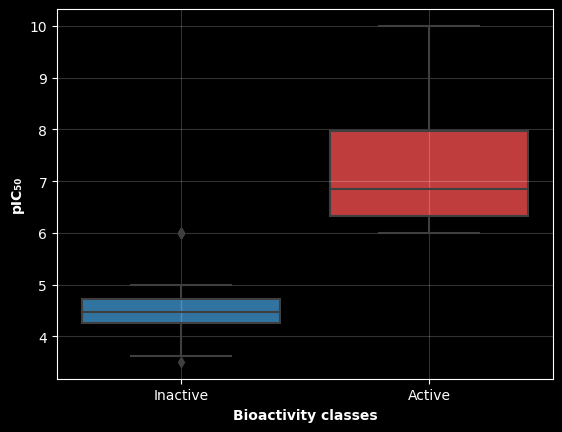

In [54]:
sns.boxplot(data=binary,x='Inhib_class',y='pIC50',palette=["tab:blue","tab:red"])
plt.xlabel('Bioactivity classes',fontsize=10,fontweight='bold'),plt.ylabel('pIC\u2085\u2080',fontsize=10,fontweight='bold')
plt.tick_params(labelsize=10)
plt.grid(alpha=0.2)

In [55]:
U, p = stats.mannwhitneyu(binary['pIC50'][binary['Inhib_class']=='Inactive'],binary['pIC50'][binary['Inhib_class']=='Active'],alternative='two-sided',nan_policy='omit')

In [56]:
print("Test Statistic U =",U,"\np-value =",p)

Test Statistic U = 0.0 
p-value = 9.656538433657327e-248


The test concludes that the two groups are different from each other and since the p-value of the test of the groups, against pIC<sub>50</sub> values, is less than 0.05, we can reject the Null hypothesis.

####Molar Weights of Active and Inactive compounds

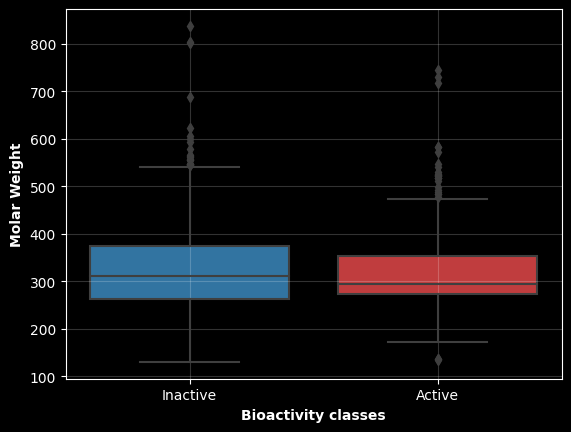

In [57]:
sns.boxplot(data=binary,x='Inhib_class',y='MW',palette=["tab:blue","tab:red"])
plt.xlabel('Bioactivity classes',fontsize=10,fontweight='bold'),plt.ylabel('Molar Weight',fontsize=10,fontweight='bold')
plt.tick_params(labelsize=10)
plt.grid(alpha=0.2)

In [58]:
U, p = stats.mannwhitneyu(binary['MW'][binary['Inhib_class']=='Inactive'],binary['MW'][binary['Inhib_class']=='Active'],alternative='two-sided',nan_policy='omit')

In [59]:
print("Test Statistic U =",U,"\np-value =",p)

Test Statistic U = 330695.5 
p-value = 0.04055549079799751


The test concludes that the two groups are different from each other and since the p-value of the test of the groups, against Molar Weight values, is less than 0.05, we can reject the Null hypothesis.

####\# of Hydrogen Acceptors observations of Active and Inactive compounds

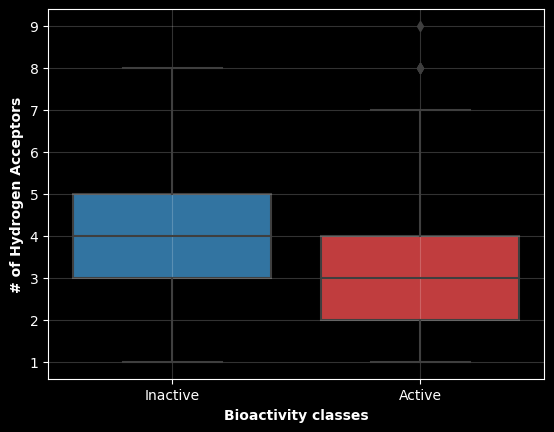

In [60]:
sns.boxplot(data=binary,x='Inhib_class',y='NumHAcceptors',palette=["tab:blue","tab:red"])
plt.xlabel('Bioactivity classes',fontsize=10,fontweight='bold'),plt.ylabel('# of Hydrogen Acceptors',fontsize=10,fontweight='bold')
plt.tick_params(labelsize=10)
plt.grid(alpha=0.2)

In [61]:
U, p = stats.mannwhitneyu(binary['NumHAcceptors'][binary['Inhib_class']=='Inactive'],binary['NumHAcceptors'][binary['Inhib_class']=='Active'],alternative='two-sided',nan_policy='omit')

In [62]:
print("Test Statistic U =",U,"\np-value =",p)

Test Statistic U = 360973.5 
p-value = 6.819794548574602e-08


The test concludes that the two groups are different from each other and since the p-value of the test of the groups, against # of Hydrogen Acceptors observations, is less than 0.05, we can reject the Null hypothesis.

####\# of Hydrogen Donors observations of Active and Inactive compounds

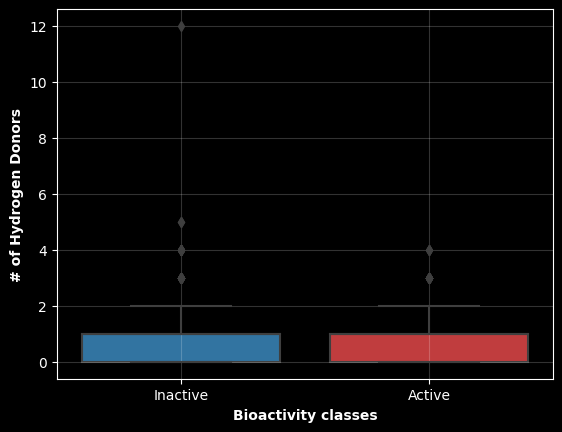

In [63]:
sns.boxplot(data=binary,x='Inhib_class',y='NumHDonors',palette=["tab:blue","tab:red"])
plt.xlabel('Bioactivity classes',fontsize=10,fontweight='bold'),plt.ylabel('# of Hydrogen Donors',fontsize=10,fontweight='bold')
plt.tick_params(labelsize=10)
plt.grid(alpha=0.2)

In [64]:
U, p = stats.mannwhitneyu(binary['NumHDonors'][binary['Inhib_class']=='Inactive'],binary['NumHDonors'][binary['Inhib_class']=='Active'],alternative='two-sided',nan_policy='omit')

In [65]:
print("Test Statistic U =",U,"\np-value =",p)

Test Statistic U = 337865.5 
p-value = 0.0025672330943938455


The test concludes that the two groups are different from each other and since the p-value of the test of the groups, against # of Hydrogen Donors observations, is less than 0.05, we can reject the Null hypothesis.

####Octanol-Water Partition Coefficients of Active and Inactive compounds

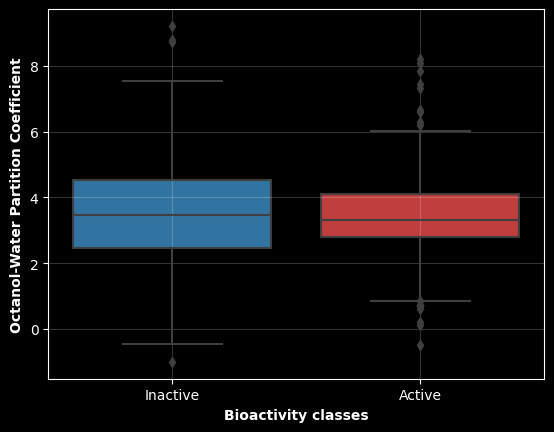

In [66]:
sns.boxplot(data=binary,x='Inhib_class',y='LogP',palette=["tab:blue","tab:red"])
plt.xlabel('Bioactivity classes',fontsize=10,fontweight='bold'),plt.ylabel('Octanol-Water Partition Coefficient',fontsize=10,fontweight='bold')
plt.tick_params(labelsize=10)
plt.grid(alpha=0.2)

In [67]:
U, p = stats.mannwhitneyu(binary['LogP'][binary['Inhib_class']=='Inactive'],binary['LogP'][binary['Inhib_class']=='Active'],alternative='two-sided',nan_policy='omit')

In [68]:
print("Test Statistic U =",U,"\np-value =",p)

Test Statistic U = 328151.5 
p-value = 0.0761199018614227


The test concludes that the two groups are not different from each other and since the p-value of the test of the groups, against Octanol-Water Partition Coefficient, is greater than 0.05, we can't reject the Null hypothesis.

####Ligand Efficiency values of Active and Inactive compounds

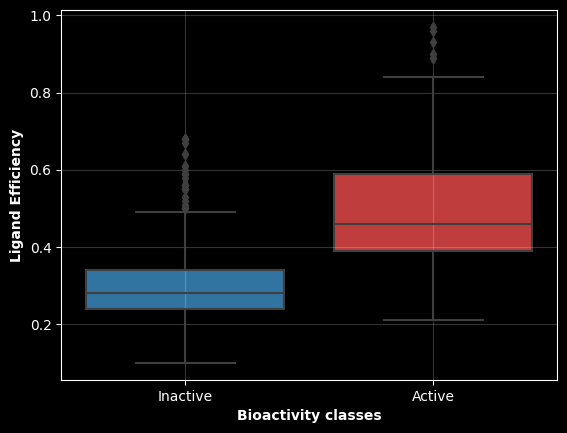

In [69]:
sns.boxplot(data=binary,x='Inhib_class',y='le',palette=["tab:blue","tab:red"])
plt.xlabel('Bioactivity classes',fontsize=10,fontweight='bold'),plt.ylabel('Ligand Efficiency',fontsize=10,fontweight='bold')
plt.tick_params(labelsize=10)
plt.grid(alpha=0.2)

In [70]:
U, p = stats.mannwhitneyu(binary['le'][binary['Inhib_class']=='Inactive'],binary['le'][binary['Inhib_class']=='Active'],alternative='two-sided',nan_policy='omit')

In [71]:
print("Test Statistic U =",U,"\np-value =",p)

Test Statistic U = 70237.5 
p-value = 1.2713610638593541e-149


The test concludes that the two groups are different from each other and since the p-value of the test of the groups, against Ligand Efficiency values, is less than 0.05, we can reject the Null hypothesis.

####Lipophilic Ligand Efficiency values of Active and Inactive compounds

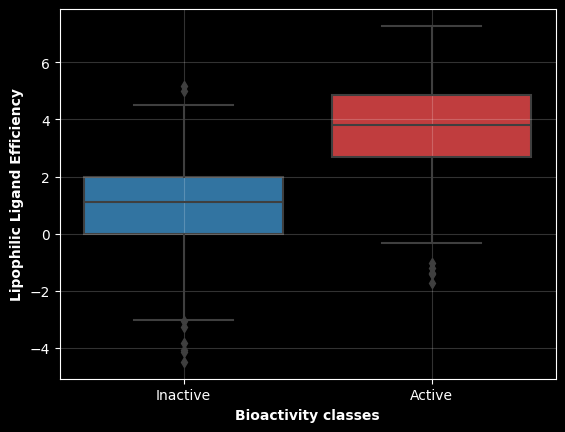

In [72]:
sns.boxplot(data=binary,x='Inhib_class',y='lle',palette=["tab:blue","tab:red"])
plt.xlabel('Bioactivity classes',fontsize=10,fontweight='bold'),plt.ylabel('Lipophilic Ligand Efficiency',fontsize=10,fontweight='bold')
plt.tick_params(labelsize=10)
plt.grid(alpha=0.2)

In [73]:
U, p = stats.mannwhitneyu(binary['lle'][binary['Inhib_class']=='Inactive'],binary['lle'][binary['Inhib_class']=='Active'],alternative='two-sided',nan_policy='omit')

In [74]:
print("Test Statistic U =",U,"\np-value =",p)

Test Statistic U = 57154.5 
p-value = 6.475155949096012e-166


The test concludes that the two groups are different from each other and since the p-value of the test of the groups, against Lipophilic Ligand Efficiency values, is less than 0.05, we can reject the Null hypothesis.

####Binding Efficiency Indices of Active and Inactive compounds

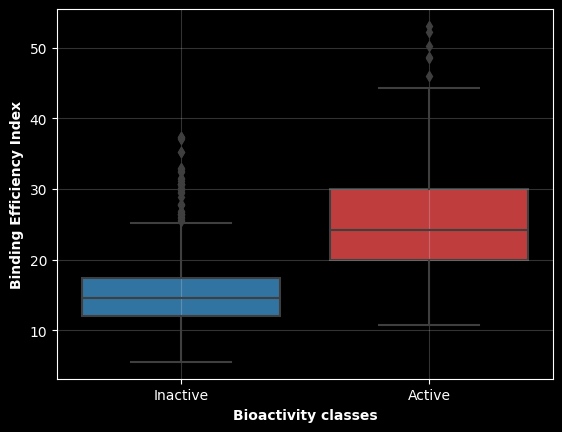

In [75]:
sns.boxplot(data=binary,x='Inhib_class',y='bei',palette=["tab:blue","tab:red"])
plt.xlabel('Bioactivity classes',fontsize=10,fontweight='bold'),plt.ylabel('Binding Efficiency Index',fontsize=10,fontweight='bold')
plt.tick_params(labelsize=10)
plt.grid(alpha=0.2)

In [76]:
U, p = stats.mannwhitneyu(binary['bei'][binary['Inhib_class']=='Inactive'],binary['bei'][binary['Inhib_class']=='Active'],alternative='two-sided',nan_policy='omit')

In [77]:
print("Test Statistic U =",U,"\np-value =",p)

Test Statistic U = 72808.0 
p-value = 2.2289628970655737e-146


The test concludes that the two groups are different from each other and since the p-value of the test of the groups, against Binding Efficiency indices, is less than 0.05, we can reject the Null hypothesis.

####Surface Binding Efficiency Indices of Active and Inactive compounds

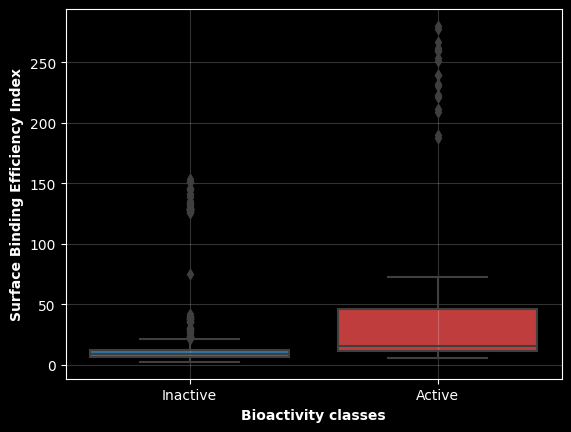

In [78]:
sns.boxplot(data=binary,x='Inhib_class',y='sei',palette=["tab:blue","tab:red"])
plt.xlabel('Bioactivity classes',fontsize=10,fontweight='bold'),plt.ylabel('Surface Binding Efficiency Index',fontsize=10,fontweight='bold')
plt.tick_params(labelsize=10)
plt.grid(alpha=0.2)

In [79]:
U, p = stats.mannwhitneyu(binary['sei'][binary['Inhib_class']=='Inactive'],binary['sei'][binary['Inhib_class']=='Active'],alternative='two-sided',nan_policy='omit')

In [80]:
print("Test Statistic U =",U,"\np-value =",p)

Test Statistic U = 142945.0 
p-value = 5.135295080365303e-74


The test concludes that the two groups are different from each other and since the p-value of the test of the groups, against Surface Binding Efficiency indices, is less than 0.05, we can reject the Null hypothesis.

#### Result

The results of testing with Mann Whitney U test tells us that except for ***Octanol-Water Partition Coefficient***, all the other features can reject the Null hypothesis and we can conclude that Active group compounds and Inactive group compounds are statistically different from each other